# Исследование объявлений о продаже квартир

## Описание проекта

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

**Цель исследования - проверить следующие гипотезы:**

1. Цена на квартиру прямо зависит от метража, количества комнат, этажа расположения и удаленности от центра.
2. Чем ближе к центру Санкт-Петербурга, тем выше цена за квадратный метр.
3. За последние годы цены на квартиры только растут.

## Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Загрузка библиотек

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import numpy as np

#другое
pd.options.display.expand_frame_repr = False
import warnings
warnings.filterwarnings('ignore')

#загрузка файлов с диска
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


## Загрузка и предобработка данных

In [206]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/2_real_estate.csv', sep = '\t')
old_len_df = df.shape[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [207]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [208]:
# Только в одном столбце есть нарушение общего стиля. Исправим:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

### Обработка пропусков

In [209]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Во многих столбцах пропущены значения, необходимо заполнить пропущенные значения, где уместно.

In [210]:
def count_nan_ratio(column):
    return print('Пропущено {:.1%}'. format(df[column].isna().value_counts()[1] / len(df), 2) + ' значений')

#### Пропущенные значения в столбце ceiling_height.

In [211]:
count_nan_ratio('ceiling_height')

Пропущено 38.8% значений


> Информация нужная, но она отсуствует в 38,8% случаев. Предполагаю, что в этих случаях люди просто не знают высоту своих потолков и не считают, что эта информация важна при заполнении объявления, иначе бы выяснили данный параметр.
>
> Высота потолков зависит от типа дома, но такой информации у нас нет. Зато есть этажность дома и удаленность от центра: ведь 5-этажные доходные дома в центре отличаются высотой потолков от "хрущёвки" где-нибудь в спальных районах на окраине Санкт-Петербурга или Ленинградской области.
>
> Данные в *ceiling_height* будут заполнены, после того, как разберёмся с данными в *locality_name* и *city_centers_nearest*.
[Продолжение]()

#### Пропущенные значения в столбце floors_total.

In [212]:
count_nan_ratio('floors_total')

Пропущено 0.4% значений


In [213]:
# изучим этаж продаваемой квартиры и популярные значения всех этажей в доме
print(df[df['floors_total'].isna()]['floor'].value_counts())
df['floors_total'].value_counts()

4     10
6      9
8      8
12     6
9      5
21     4
5      4
7      4
3      4
19     3
11     3
13     3
1      3
18     3
15     3
10     3
24     2
2      2
20     2
14     2
22     1
17     1
23     1
Name: floor, dtype: int64


5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

> Из данных видно, что все строки с пропусками встречаются в выборке по максимальной этажности здания. Значит в объявлениях с квартирами, расположенными на последнем этаже, продавец пропускает информацию по этажности дома.
>
> Соответственно заполним пропуски в *floors_total* значениями из *floor*.

In [214]:
df['floors_total'] = df['floors_total'].fillna(0)

def fill_floors_total(row):
    if row[6] == 0:
        row[6] = row[8]
    return row
df = df.apply(fill_floors_total, axis=1)

# проверим, все ли пропущенные значения мы обработали
df['floors_total'].isna().value_counts()

False    23699
Name: floors_total, dtype: int64

#### Пропущенные значения в столбце living_area.

In [215]:
count_nan_ratio('living_area')

Пропущено 8.0% значений


Теперь нужно проверить соответствует ли указанная в таблице жилая площадь требованиям СП Для жилых многоквартирных домов:

- 1 комната - минимальный размер 28 кв.м.
- 2 комнаты - минимальный размер 44 кв.м.
- 3 комнаты - минимальный размер 56 кв.м.
- 4 комнаты - минимальный размер 70 кв.м.
- 5 комнат - минимальный размер 103 кв.м.
- больше 5 комнат - минимальный размер равен количеству_комнат * 20 кв.м.

In [216]:
# узнаем сколько квартир у нас по каждому количеству комнат
# студии учтём, как однокомнатные квартиры
apart_with_1_room = df[df['rooms'] == 0] + df[df['rooms'] == 1]
apart_with_2_rooms = df[df['rooms'] == 2]
apart_with_3_rooms = df[df['rooms'] == 3]
apart_with_4_rooms = df[df['rooms'] == 4]
apart_with_5_rooms = df[df['rooms'] == 5]
apart_with_many_rooms = df[df['rooms'] > 5]

# проверим сколько квартир соответсвует стандарту по размеру общей площади
good_apart_with_1_room = df.query('(rooms == 1 or rooms == 0) and total_area >= 28')
good_apart_with_2_rooms = df.query('rooms == 2 and total_area >= 44')
good_apart_with_3_rooms = df.query('rooms == 3 and total_area >= 56')
good_apart_with_4_rooms = df.query('rooms == 4 and total_area >= 70')
good_apart_with_5_rooms = df.query('rooms == 5 and total_area >= 103')
good_apart_with_many_rooms = df.query('rooms > 5 and (total_area >= (rooms) * 20)')

# оценим каков процент квартир, не соотвествующих государственным стандартам
all_good_apart = (
    good_apart_with_1_room.shape[0] +
    good_apart_with_2_rooms.shape[0] +
    good_apart_with_3_rooms.shape[0] +
    good_apart_with_4_rooms.shape[0] +
    good_apart_with_5_rooms.shape[0] +
    good_apart_with_many_rooms.shape[0])
print('{:.1%}'. format((df.shape[0] - all_good_apart) / df.shape[0])
      + ' выборки не соответсвуют государственным требованиям СП Для жилых многоквартирных домов.')

7.7% выборки не соответсвуют государственным требованиям СП Для жилых многоквартирных домов.


In [217]:
# удалим эти значения
frames = [good_apart_with_1_room,good_apart_with_2_rooms, good_apart_with_3_rooms,
          good_apart_with_4_rooms, good_apart_with_5_rooms, good_apart_with_many_rooms]
data_with_good_apart = pd.concat(frames)
data_with_good_apart = data_with_good_apart.sort_index()
df = data_with_good_apart

In [218]:
# оценим зависимость жилой площади от общей площади недвижимости
living_area_ratio_mean = (df['living_area'] / df['total_area']).mean()
living_area_ratio_median = (df['living_area'] / df['total_area']).median()
print(living_area_ratio_mean)
print(living_area_ratio_median)
print(living_area_ratio_mean/living_area_ratio_median)

0.556078346593417
0.5600739371534196
0.9928659587691043


In [219]:
# сравним полученные результаты с соотношением жилой площади к общей по выборке в целом
living_area_mean = df['living_area'].mean()
living_area_median = df['living_area'].median()
print(living_area_mean, living_area_median, living_area_mean/living_area_median)

total_area_mean = df['total_area'].mean()
total_area_median = df['total_area'].median()
print(total_area_mean, total_area_median, total_area_mean/total_area_median)

living_area_ratio_mean_series = living_area_mean / total_area_mean
living_area_ratio_median_series = living_area_median / total_area_median
print(living_area_ratio_mean_series, living_area_ratio_median_series, living_area_ratio_mean_series/ living_area_ratio_median_series)

34.878596888569014 30.4 1.1473222660713491
61.792221561542334 54.0 1.144300399287821
0.5644496347138364 0.5629629629629629 1.0026407985048411


In [220]:
# можно заполнять пропуски по формуле: 'living_area' = 'total_area' * living_area_ratio_mean
df['living_area'] = df['living_area'].fillna(0)

def fill_living_area(row):
    if row[7] == 0:
        row[7] = float(format(row[2] * living_area_ratio_mean, '.2f'))
    return row
df = df.apply(fill_living_area, axis=1)

# проверим, все ли пропущенные значения мы обработали
df['living_area'].isna().value_counts()

False    21863
Name: living_area, dtype: int64

#### Пропущенные значения в столбце kitchen_area.

In [221]:
count_nan_ratio('kitchen_area')

Пропущено 8.4% значений


Нужно проверить, нет ли такой связи, что если квартира - студия, то там отсутствуют эти данные. Ведь в студиях нет явного деления площади на ту, которая относится к кухне, и ту, которая относится к жилой площади:

In [222]:
df.query('rooms == 0')['kitchen_area'].isnull().sum()

65

> Лишь малая часть пропусков по этим столбцам относится к студиям. Эти данные придётся так и оставить с пропусками.
>
> А вот оставшиеся пропуски заполним по формуле ***kitchen_area = total_area * kitchen_area_ratio_mean***
>
> И нужно помнить, что согласно СП Для жилых многоквартирных домов к кухне предъявляются требования по ее размеру в зависимости от количества комнат - минимально допустимый размер кухни 5 кв.м.
>
> Поэтому если произведение общей площади на это соотношение даст значение меньше 5 кв.м., то будем использовать константу в 5 кв.м.

In [223]:
# проверим сколько квартир соотвествует минимальному размеру кухни
good_kitchen_with_1_room = df.query('rooms == 1 and kitchen_area >= 5')
print('Однокомнотаных квартир с минимально-допустимой площадью кухни:', good_kitchen_with_1_room.shape[0])

good_kitchen_with_many_rooms = df.query('rooms > 1 and kitchen_area >= 6')
print('Двух- и более комнатных квартир с минимально-допустимой площадью кухни:', good_kitchen_with_many_rooms.shape[0])

# а сколько не соответствуют
bad_kitchen = df.query('kitchen_area < 5')
print('Квартир с нарушениями по площади кухни {:.2%}'. format(bad_kitchen.shape[0] / df.shape[0]) + '. И они были удалены из выборки.')
bad_index = bad_kitchen.index
df.drop(bad_index, inplace=True)

Однокомнотаных квартир с минимально-допустимой площадью кухни: 7102
Двух- и более комнатных квартир с минимально-допустимой площадью кухни: 12381
Квартир с нарушениями по площади кухни 0.18%. И они были удалены из выборки.


In [224]:
# оценим зависимость площади кухни от общей площади недвижимости
kitchen_area_ratio_mean = (df['kitchen_area'] / df['total_area']).mean()
kitchen_area_ratio_median = (df['kitchen_area'] / df['total_area']).median()
print(kitchen_area_ratio_mean, kitchen_area_ratio_median, kitchen_area_ratio_mean/kitchen_area_ratio_median)

0.19048074828687772 0.17708333333333331 1.0756559903258978


In [225]:
# можно заполнять пропуски по формуле: 'kitchen_area' = 'total_area' * kitchen_area_ratio_mean
df['kitchen_area'] = df.loc[df['rooms'] > 0, 'kitchen_area'].fillna(0)

def fill_kitchen_area(row):
    if row[12] == 0:
        fill_kitchen_area_normal = float(format(row[2] * kitchen_area_ratio_mean, '.2f'))
        if row[4] == 1:
            if fill_kitchen_area_normal >= 5:
                row[12] = fill_kitchen_area_normal
            else:
                row[12] = 5
        elif row[4] > 1:
            if fill_kitchen_area_normal >= 6:
                row[12] = fill_kitchen_area_normal
            else:
                row[12] = 6
    return row

df = df.apply(fill_kitchen_area, axis=1)

# заменим пропущенные значения площади кухнини в квартирах-студиях на нули
df.loc[df['rooms'] == 0, 'kitchen_area'] = 0

# проверим, все ли пропущенные значения мы обработали
df['kitchen_area'].isna().value_counts()

False    21824
Name: kitchen_area, dtype: int64

**Проверим соотношение суммы площадей жилой зоны и кухни к общей площади квартиры.**

In [226]:
unreal_data = df.query('living_area + kitchen_area > total_area').shape[0]
print('Доля квартир с неправильно указанной площадью {:.2%}'. format(unreal_data / df.shape[0]))
bad_total_area = df.query('(kitchen_area + living_area ) > total_area')
bad_total_area.sample(10)

Доля квартир с неправильно указанной площадью 0.37%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19344,14,4300000.0,62.0,2016-05-10T00:00:00,3,2.60,5.0,42.0,3,False,...,21.00,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,107.0
1060,10,5200000.0,50.0,2015-11-06T00:00:00,2,NaN,35.0,39.0,15,False,...,20.50,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0
13428,18,8500000.0,75.0,2018-02-13T00:00:00,3,2.80,4.0,56.0,1,NaN,...,27.00,2.0,Сестрорецк,54160.0,35259.0,0.0,NaN,0.0,NaN,156.0
16606,8,6695000.0,58.0,2018-10-11T00:00:00,2,NaN,6.0,54.0,6,NaN,...,11.05,NaN,Санкт-Петербург,31877.0,5347.0,2.0,231.0,3.0,537.0,42.0
19268,10,3450000.0,43.3,2018-09-18T00:00:00,1,2.75,18.0,41.3,7,NaN,...,8.25,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,44.0
424,14,11500000.0,98.0,2016-05-10T00:00:00,3,2.65,3.0,88.0,3,False,...,18.67,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
16325,20,8250000.0,79.7,2018-07-16T00:00:00,3,2.55,16.0,60.0,3,NaN,...,20.00,2.0,Санкт-Петербург,25974.0,14687.0,1.0,464.0,0.0,NaN,60.0
6802,15,7500000.0,69.0,2017-02-15T00:00:00,2,4.50,3.0,64.0,3,False,...,25.00,NaN,Санкт-Петербург,40326.0,15610.0,0.0,NaN,2.0,852.0,427.0
1354,14,7300000.0,54.5,2018-08-20T00:00:00,2,NaN,16.0,38.0,12,NaN,...,19.00,2.0,Санкт-Петербург,51030.0,14721.0,0.0,NaN,0.0,NaN,NaN
4339,19,6900000.0,72.0,2019-03-25T00:00:00,3,3.50,4.0,70.0,1,True,...,13.71,NaN,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


> Рассматривая данные о превышающей сумме жилой площади можно заметить:
>
>- Значение жилой площади свопадает с значением площади кухни. Скорее всего - это квартиры студии.
- Некоторые продавцы указывают часть кухонной площади, как жилую. Именно по этой причине может получится, что сумма этих площадей больше общей.

In [227]:
# посмотрим на предполагаемые квартиры студии
bad_total_area.query('kitchen_area == living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
11579,7,4300000.0,33.00,2016-05-13T00:00:00,1,NaN,16.0,26.00,14,NaN,...,26.00,0.0,Санкт-Петербург,37180.0,12702.0,0.0,NaN,0.0,NaN,180.0
21266,10,8800000.0,60.00,2018-07-23T00:00:00,2,3.15,6.0,35.00,4,NaN,...,35.00,NaN,Санкт-Петербург,16558.0,8089.0,1.0,531.0,2.0,518.0,NaN


> Квартира с индексом [21266], судя по общей площади и количеству указанных комнат - это не студия, а полноценная однокомнатная квартира. Видимо в этом объявлении продавец просто ошибся, заполняя форму с жилой площадью и площадью кухни. Это объявление удалим из выборки вместе с другими объявлениями с нарушениями по общей площади.

In [228]:
error_total_area = bad_total_area.query('kitchen_area != living_area')
bad_index = error_total_area.index

print('Было удалено около {:.2%}'. format(error_total_area.shape[0] / df.shape[0])
      + ' квартир с неправильно указанными данными по планировке.')

df.drop(bad_index, inplace=True)
df.drop(21266, inplace=True)

Было удалено около 0.36% квартир с неправильно указанными данными по планировке.


#### Пропущенные значения в столбце is_apartment.

In [229]:
count_nan_ratio('is_apartment')

Пропущено 11.8% значений


> Предполагаю, что данных нет там, где ответ - "0", т.е. это не апартаменты.
>
> Причиной может быть следующее: явление "апартаменты" в недвижимости появилось недавно, и люди не особо знают разницу между апартаментами и квартирами, поэтому при заполнении формы для создания объявления просто пропускали этот пункт. И наоборот, владельцы апартаментов точно в курсе, что у них апартаменты, поэтому по ним данные оказались заполненными.
>
> Поэтому пропуски в is_apartment заменим на False, так как отсуствие по этому пункту говорит нам, что перед нами обычная квартира.

In [230]:
df['is_apartment'] = df['is_apartment'].fillna(False)

# проверим, все ли пропущенные значения мы обработали
df['is_apartment'].isna().value_counts()

False    21745
Name: is_apartment, dtype: int64

#### Пропущенные значения в столбце balcony.
Очевидно, что в тех квартирах, где балкон отсутствует, там вместо 0 стоит NaN. Поэтому просто заполним отсутствующие значения 0.

In [231]:
# пропущенные значения в столбце balcony
count_nan_ratio('balcony')
df['balcony'] = df['balcony'].fillna(0)

# проверим, все ли пропущенные значения мы обработали
df['balcony'].isna().value_counts()

Пропущено 48.1% значений


False    21745
Name: balcony, dtype: int64

#### Пропущенные значения в столбце locality_name.

In [232]:
count_nan_ratio('locality_name')

Пропущено 0.2% значений


In [233]:
# посмотрим, какие значения пропущены в locality_name
nan_locality_name = df[df['locality_name'].isna()]
nan_locality_name.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,False,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,NaN,9.0,44.38,2,False,...,15.20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,NaN,5.0,47.30,2,False,...,8.30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,False,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
20654,7,6100000.0,43.0,2016-01-13T00:00:00,1,NaN,5.0,21.00,3,False,...,12.00,1.0,NaN,24385.0,4604.0,1.0,700.0,0.0,NaN,164.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,False,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
14273,2,4422000.0,60.0,2016-03-23T00:00:00,2,2.75,23.0,32.00,14,False,...,11.90,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,90.0
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,NaN,9.0,30.50,2,False,...,29.20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0
23214,3,7990000.0,56.0,2016-05-31T00:00:00,2,NaN,6.0,31.14,5,False,...,10.67,0.0,NaN,11206.0,8943.0,0.0,NaN,0.0,NaN,70.0
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,False,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0


Можно попробовать восстановить пропущенные данные в столбце *locality_name* по данным из *city_centers_nearest*. Но там, где в столбце *city_centers_nearest* тоже пропущено значение, уже восстановлению не подлежит. Придется удалить эти значения.

Теперь можно провести поиск расстояния из *city_centers_nearest* по указанному в *locality_name* от центра Санкт-Петербурга.

Но сначала нужно нужно "очистить" данные от неявных дубликатов.
[Продолжение](https://colab.research.google.com/drive/1xD4ybtvpZU14bjlYI50IVmqxcSEJYoQm#scrollTo=hbclWo63Lgqj&line=1&uniqifier=1)

In [234]:
bad_locality_name = nan_locality_name[nan_locality_name['city_centers_nearest'].isna()]
bad_index = bad_locality_name.index
print('Было удалено около {:.2%}'. format(bad_locality_name.shape[0] / df.shape[0])
      + ' данных не подлежащих восстановлению.')
df.drop(bad_index, inplace=True)

Было удалено около 0.04% данных не подлежащих восстановлению.


#### Пропущенные значения в столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest.

In [235]:
count_nan_ratio('airports_nearest')

Пропущено 22.2% значений


In [236]:
count_nan_ratio('city_centers_nearest')

Пропущено 22.1% значений


In [237]:
count_nan_ratio('parks_around3000')

Пропущено 22.1% значений


In [238]:
count_nan_ratio('parks_nearest')

Пропущено 34.7% значений


In [239]:
count_nan_ratio('ponds_around3000')

Пропущено 22.1% значений


In [240]:
count_nan_ratio('ponds_nearest')

Пропущено 39.1% значений


> Очевидно данные в этих столбцах были рассчитаны самой системой. И они могут отустствовать по причине того, что относительно конкретно взятого населенного пункта искались заданные объекты в определенном радиусе. И если в пределах этого радиуса ни аэропорта, ни парков, ни водоёмов не было, то и указать в этом столбце системе было нечего. Поэтому оставим эти пропуски как есть.

#### Пропущенные значения в столбце days_exposition.

In [241]:
count_nan_ratio('days_exposition')

Пропущено 13.4% значений


> Видимо, это случайная потеря данных: очевидно при выгрузке данных, квартиры всё ещё продавались, а значения в столбце проставляются только по закрытию объявления.
>
> Проставлять информацию о сроках продажи по "среднему" или "медианой" нельзя, поэтому придется оставить эти пропуски в данных как есть.

### Изменение типов данных

In [242]:
# заменим тип данных по дате публикации со строчного на datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

**Следующие столбцы приведём в целочисленный тип(int):**

- *last_price* - вряд ли продавцы указывают цену на квартиру в рублях до копеек.
- *floors_total* - в домах не может быть половина этажа. Только целые.
- *balcony* - и пол балкона тоже не может быть.

In [243]:
df['last_price'] = pd.to_numeric(df['last_price'], downcast='integer')
df['floors_total'] = pd.to_numeric(df['floors_total'], downcast='integer')
df['balcony'] = pd.to_numeric(df['balcony'], downcast='integer')

Пропущенные значения в parks_around3000, ponds_around3000 и days_exposition заполним 0 и приведём в целочисленный тип (int).

In [244]:
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int')
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21737 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21737 non-null  int64         
 1   last_price            21737 non-null  int32         
 2   total_area            21737 non-null  float64       
 3   first_day_exposition  21737 non-null  datetime64[ns]
 4   rooms                 21737 non-null  int64         
 5   ceiling_height        13405 non-null  float64       
 6   floors_total          21737 non-null  int8          
 7   living_area           21737 non-null  float64       
 8   floor                 21737 non-null  int64         
 9   is_apartment          21737 non-null  bool          
 10  studio                21737 non-null  bool          
 11  open_plan             21737 non-null  bool          
 12  kitchen_area          21737 non-null  float64       
 13  balcony         

Значения в *airports_nearest, city_centers_nearest, parks_nearest и ponds_nearest* не могут быть изменены на int из-за значений NaN.

### Дубликаты

In [245]:
df.duplicated().sum()

0

#### Устранение неявных дубликатов в столбце locality_name.

In [246]:
print(df['locality_name'].value_counts())
df['locality_name'].unique()

Санкт-Петербург        14688
посёлок Мурино           452
посёлок Шушары           415
Всеволожск               369
Пушкин                   340
                       ...  
деревня Щеглово            1
поселок Лукаши             1
посёлок Алексеевка         1
посёлок Белоостров         1
посёлок Возрождение        1
Name: locality_name, Length: 346, dtype: int64


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Петергоф', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'Сясьстрой',
       'посёлок Понтонный', 'деревня Старая', 'деревня Лесколово',
       'Сланцы', 'село Путилово', 'Ивангород', 'Мурино', 

В данных имеются дубликаты. Спасибо букве ё, благодаря ей у нас появились такие значения, как "поселок" и "посёлок", "поселок городского типа" и "посёлок городского типа". А муниципальная реформа от 2014 года подарила нам такие варианты: "городской посёлок..." и "посёлок городского типа...".

Придётся всё почитсить.

In [247]:
# для чистоты исследования придётся избавиться от пустых значений в locality_name
# для этого создадим копию датафрейма
data_copy = copy.deepcopy(df)
bad_locality_name = data_copy[data_copy['locality_name'].isna()]
bad_index = bad_locality_name.index
data_copy.drop(bad_index, inplace=True)

# напишем функцию, которая очистит наши данные в locality_name
def clean_locality_name(row):
    #print(1, row)
    split_name = row.split()
    clean_name = []
    for word in split_name:
        if word[0].isupper():
            clean_name.append(word)
    clean_name = ' '.join(word for word in clean_name)
    #print(2, clean_name)
    return clean_name

# создадим новый столбец local_name с "очищенными" названиями мест
data_copy['local_name'] = data_copy['locality_name'].apply(clean_locality_name)
data_copy.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,local_name
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,Санкт-Петербург
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,Шушары
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,Санкт-Петербург
3,0,64900000,159.00,2015-07-24,3,NaN,14,88.42,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,Санкт-Петербург
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,Санкт-Петербург
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55,Янино-1
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,Парголово
7,5,7915000,71.60,2019-04-18,2,NaN,24,39.82,22,False,...,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,0,Санкт-Петербург
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189,Мурино
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,Санкт-Петербург


In [248]:
# посмотрим, что у нас с уникальными значениями нового столбца
data_copy['local_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Пушкин', 'Кудрово', 'Коммунар',
       'Колпино', 'Красный Бор', 'Петергоф', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Новое Девяткино', 'Металлострой',
       'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский',
       'Новая Ропша', 'Павловск', 'Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино',
       'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское',
       'Красное Село', 'Сясьстрой', 'Понтонный', 'Старая', 'Лесколово',
       'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург', 'Кировск',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Луга', 'Волосово', 'Павлово',
       'Оредеж', 'Молодёжное', 'Победа', 'Нурма', 'Тосно', 'Новый Свет',
       'Стрельна', 'Бокситогорск', 'Александровская', 'Пикалёво',
       'Терволово', 'Советский', 'Кириши', 'Подпорожье

Эти уникальные значения станут списоком ключей для словаря, по которому можно соотнести и найти среднее растояние от названия местности с центром города. Так мы заполним пропуски в *locality_name и city_centers_nearest*.

In [249]:
local_name_keys = data_copy['local_name'].unique()
df['locality_name'] = data_copy['local_name']

### Обработка пропусков: пропущенные значения в столбце locality_name (продолжение).

In [250]:
# для чистоты исследования придётся избавиться от пустых значений в cityCenters_nearest
# всё ещё работаем с копией датафрейма
bad_city_centers_nearest = data_copy[data_copy['city_centers_nearest'].isna()]
bad_index = bad_city_centers_nearest.index
data_copy.drop(bad_index, inplace=True)

locality_and_city_center_dict = {}
def make_locality_and_city_center_dict(data_frame):
    for name in local_name_keys:
        mean = data_frame[data_frame['local_name'] == name]['city_centers_nearest'].mean()
        locality_and_city_center_dict[name] = mean

# посмотрим на получившийся словарь
make_locality_and_city_center_dict(data_copy)
locality_and_city_center_dict

{'Санкт-Петербург': 11614.064939503725,
 'Шушары': 24288.4806763285,
 'Янино-1': nan,
 'Парголово': 19921.040625,
 'Мурино': 21888.0,
 'Ломоносов': 50495.57943925234,
 'Сертолово': nan,
 'Пушкин': 28850.153392330383,
 'Кудрово': nan,
 'Коммунар': nan,
 'Колпино': 32207.196721311477,
 'Красный Бор': nan,
 'Петергоф': 35962.306818181816,
 'Гатчина': nan,
 'Фёдоровское': nan,
 'Выборг': nan,
 'Кронштадт': 49049.42352941177,
 'Новое Девяткино': nan,
 'Металлострой': 27501.55172413793,
 'Лебяжье': nan,
 'Сиверский': nan,
 'Молодцово': nan,
 'Кузьмоловский': nan,
 'Новая Ропша': nan,
 'Павловск': 33294.78125,
 'Пикколово': nan,
 'Всеволожск': nan,
 'Волхов': nan,
 'Кингисепп': nan,
 'Приозерск': nan,
 'Сестрорецк': 34591.63742690058,
 'Куттузи': nan,
 'Аннино': nan,
 'Плодовое': nan,
 'Заклинье': nan,
 'Торковичи': nan,
 'Первомайское': nan,
 'Красное Село': 30024.16149068323,
 'Сясьстрой': nan,
 'Понтонный': 32201.777777777777,
 'Старая': nan,
 'Лесколово': nan,
 'Сланцы': nan,
 'Путилово':

Из получившегося словаря видно, что не все объявления имеют значение расстояния от центра Санкт_петербурга. Нет таких данных для городов, деревней и посёлков Ленинградской области.

Посмотрим, сколько сейчас пропусков в столбце *city_centers_nearest*, с указанным городом Санкт-Петербург.

In [251]:
spb_apart_sales_data = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest.isna()')
spb_apart_sales_data['city_centers_nearest'].isna().value_counts()

True    59
Name: city_centers_nearest, dtype: int64

Для этих 59 пропущенных значений восстановим среднее расстояние от центра города в столбце city_centers_nearest.

In [252]:
df['locality_name'] = df['locality_name'].fillna('empty')
print(df[df['locality_name'] == 'empty']['city_centers_nearest'].value_counts())

17369.0    8
4258.0     2
8943.0     2
12332.0    2
23659.0    1
4805.0     1
41294.0    1
4604.0     1
3312.0     1
8429.0     1
10976.0    1
1322.0     1
8619.0     1
9497.0     1
9633.0     1
4474.0     1
4383.0     1
3801.0     1
31813.0    1
4065.0     1
4627.0     1
8582.0     1
16788.0    1
9538.0     1
5382.0     1
3039.0     1
3902.0     1
8127.0     1
1780.0     1
Name: city_centers_nearest, dtype: int64


Для объявлений, чье расстояние от центра менее 17 км (минимальный радиус КАД), заменим пропуск на Санкт-Петебург. Всем остальным пропускам зададим расположение "Пригород Санкт-Петербурга".

In [253]:
def fill_locality_name(row):
    if row[14] == 'empty':
        if row[16] < 17000:
            row[14] = 'Санкт-Петебург'
        else:
            row[14] = 'Пригород Санкт-Петербурга'
    return row
# заменим пропущенные значения в locality_name
df = df.apply(fill_locality_name, axis=1)

# проверим, все ли пропущенные значения мы обработали
df['locality_name'].isna().value_counts()

False    21737
Name: locality_name, dtype: int64

### Устранение аномальных значений

In [254]:
for column in df.columns:
    count_values = df[column].value_counts()
    print(count_values)

10    1659
20    1618
9     1558
8     1422
7     1381
6     1341
11    1251
5     1177
12    1132
13     945
0      935
14     921
4      875
15     871
1      785
16     720
3      686
17     615
2      604
18     601
19     566
23      15
21      12
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: total_images, dtype: int64
4500000     312
3500000     243
4300000     236
4200000     235
3600000     228
           ... 
11207364      1
585000        1
11757590      1
2205000       1
11475000      1
Name: last_price, Length: 2904, dtype: int64
45.00     416
31.00     343
44.00     342
60.00     340
40.00     282
         ... 
130.21      1
58.71       1
60.75       1
63.19       1
76.75       1
Name: total_area, Length: 2027, dtype: int64
2018-02-01    334
2017-11-10    218
2017-10-13    106
2017-09-27    103
2018-03-26     91
             ... 
2016-09-05      1
201

#### Аномальные значения в столбце days_exposition.

In [255]:
df.query('days_exposition!=0')['days_exposition'].value_counts()

45      774
60      514
7       212
90      195
30      186
       ... 
1089      1
822       1
734       1
1037      1
971       1
Name: days_exposition, Length: 1122, dtype: int64

> Применив метод value_counts обнаружили выбивающиеся значения - у нас аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления.
>
> Немного погуглив, нашла правила размещения объявлений в Яндекс Недвижимость в зависимости от типа сделки (продажа или аренда) и вида недвижимости, оказалось что именно после этих сроков объявление считается неактуальным и снимается автоматически.(Там сейчас новые правила действуют для СПБ, но думаю, они еще не вступили в силу на момент выгрузки данных)
>
> Наверное, нужно убрать эти значения из выборки, но может быть есть ещё критерии для снятия таких объявлений, ведь часть из таких квартир могла и правда продаться в этоти сроки.

In [256]:
df[df['days_exposition'] == 45]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
78,9,4350000,37.0,2018-02-22,1,NaN,19,18.00,6,False,...,10.70,0,Санкт-Петербург,34324.0,14192.0,0,NaN,0,NaN,45
89,9,2500000,63.0,2018-10-25,3,2.50,5,43.00,4,False,...,9.00,0,Сиверский,NaN,NaN,0,NaN,0,NaN,45
110,6,3850000,72.3,2017-09-29,2,NaN,3,27.40,2,False,...,23.60,0,Пикколово,NaN,NaN,0,NaN,0,NaN,45
153,12,4350000,55.0,2017-05-21,2,2.57,9,31.20,2,False,...,8.30,0,Петергоф,45958.0,34425.0,1,589.0,0,NaN,45
158,15,3100000,47.3,2017-11-07,2,NaN,5,27.50,2,False,...,8.50,0,Янино-1,NaN,NaN,0,NaN,0,NaN,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23530,0,3000000,30.0,2018-03-28,1,2.55,5,16.68,3,False,...,5.71,0,Гатчина,NaN,NaN,0,NaN,0,NaN,45
23537,9,3600000,45.0,2017-06-14,2,2.50,5,28.70,3,False,...,5.50,1,Санкт-Петербург,12592.0,11154.0,0,NaN,1,658.0,45
23670,9,2450000,45.6,2018-02-08,1,2.80,9,25.36,2,False,...,8.69,0,Синявино,NaN,NaN,0,NaN,0,NaN,45
23679,0,2500000,35.0,2017-12-08,1,NaN,9,19.46,4,False,...,6.67,0,Сосновый Бор,NaN,NaN,0,NaN,0,NaN,45


In [257]:
df[df['days_exposition'] == 60]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22,20,5000000,58.0,2017-04-24,2,2.75,25,30.00,15,False,...,11.00,2,Кудрово,NaN,NaN,0,NaN,0,NaN,60
82,3,4500000,80.5,2018-01-15,3,NaN,25,44.76,16,False,...,15.33,0,Шушары,12430.0,18217.0,0,NaN,0,NaN,60
105,12,4900000,32.0,2018-01-07,1,NaN,25,15.00,5,False,...,9.00,0,Санкт-Петербург,52480.0,15598.0,0,NaN,1,464.0,60
118,8,4500000,31.0,2019-02-24,1,2.50,9,17.00,4,False,...,5.00,0,Санкт-Петербург,35445.0,9089.0,0,NaN,2,439.0,60
143,9,2990000,30.0,2016-06-08,1,2.50,9,20.00,9,False,...,5.60,0,Санкт-Петербург,30067.0,6262.0,0,NaN,1,332.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23577,10,3750000,45.0,2016-06-14,2,NaN,5,30.00,1,False,...,7.00,0,Понтонный,30764.0,32476.0,0,NaN,0,NaN,60
23600,8,8700000,132.0,2018-11-13,3,2.65,9,78.00,3,False,...,10.00,0,Санкт-Петербург,45157.0,17882.0,0,NaN,0,NaN,60
23621,11,5000000,37.9,2017-08-31,1,2.60,21,18.90,14,False,...,8.30,1,Санкт-Петербург,10586.0,13962.0,0,NaN,0,NaN,60
23635,9,5100000,36.0,2018-10-26,1,2.80,15,18.00,11,False,...,8.00,0,Санкт-Петербург,13643.0,11673.0,0,NaN,1,405.0,60


count    16936.000000
mean       197.897437
std        227.944356
min          1.000000
25%         46.000000
50%        115.000000
75%        262.000000
max       1580.000000
Name: days_exposition, dtype: float64

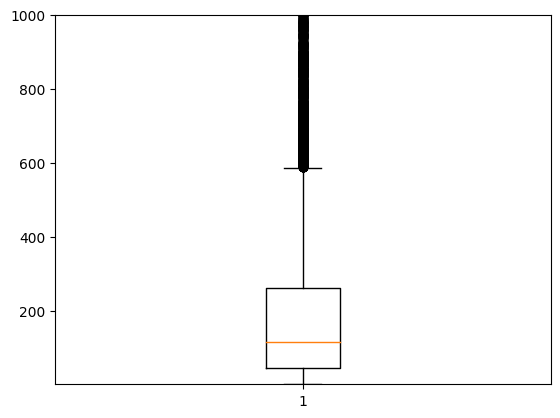

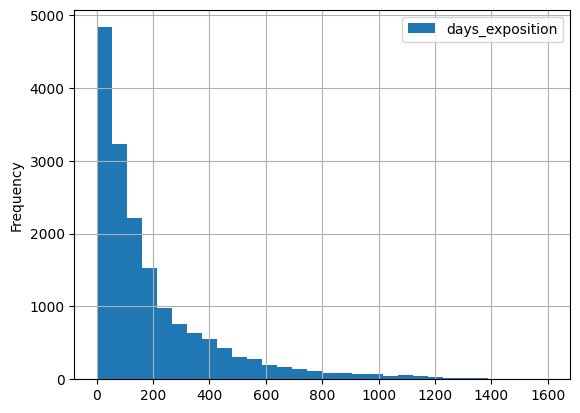

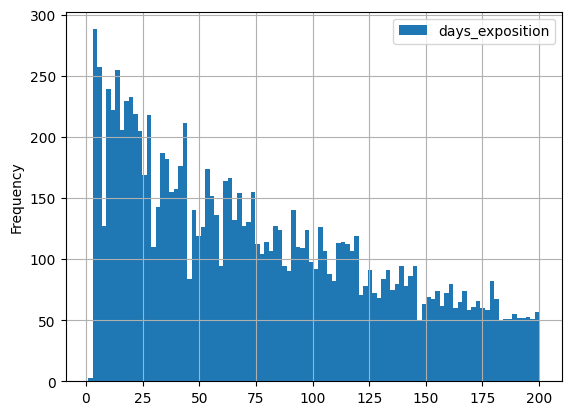

In [258]:
#отфильтруем данные от аномалий и запишем их в новый датафрейм data_without_outlier
data_without_outlier = df.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

#диаграмма размаха
plt.boxplot(data_without_outlier['days_exposition'])
plt.ylim(1,1000)

#гистограммы
data_without_outlier.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data_without_outlier.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
#data_without_outlier['days_exposition'].value_counts()
data_without_outlier['days_exposition'].describe()

> Ожидаемо, в очищенных данных с аномалиями в значениях меньших медианы получаем бОльшие значения медианы и среднего значения - 115 и 197 соответственно, вместо 95 и 180. Аналогично, теперь нормальные значения располагаются от 1 до 600 дней вместо от 1 до 500 дней.

In [259]:
# посмотрим какой процент данных придётся удалить
print('Процент удаленных данных:', '{:.2%}'.format((old_len_df - data_without_outlier.shape[0]) / old_len_df))
df = df.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

Процент удаленных данных: 28.54%


### Обработка пропусков: пропущенные значения в столбце ceiling_height (продолжение)
Для начала проверим значения в столбце ceiling_height на соответсвие государственным требованиям к высоте потолков: согласно СП Для многоквартирных домов Санкт-Петербург и Ленинградскся область относиться к климатическому району IIВ, соответсвенно, минимальная высота потолков должна быть 2.5 м.

In [260]:
good_ceiling_height = df[df['ceiling_height'] >= 2.5]
not_nan_ceiling_height = df['ceiling_height'].isna().value_counts()[0]
print('Около {:.2%}'. format((not_nan_ceiling_height - len(good_ceiling_height)) / df.shape[0])
      + ' квартир не соотвествуют требованиям по минимальной высоте потолков.')

Около 0.28% квартир не соотвествуют требованиям по минимальной высоте потолков.


In [261]:
# избавимся от аномально маленьких значений в ceiling_height
bad_ceiling_height = df[df['ceiling_height'] < 2.5]
bad_index = bad_ceiling_height.index
df.drop(bad_index, inplace=True)

In [262]:
print(df['ceiling_height'].isna().value_counts())
df.query('ceiling_height > 15')

False    10114
True      6775
Name: ceiling_height, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,10.51,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259
4643,0,4300000,45.0,2018-02-01,2,25.0,9,30.0,2,False,...,7.00,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,9.00,2,Мины,NaN,NaN,0,NaN,0,NaN,540
5669,4,4400000,50.0,2017-08-08,2,26.0,9,21.3,3,False,...,7.00,2,Санкт-Петербург,28981.0,10912.0,1,305.0,0,NaN,267
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,12.00,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38
10773,8,3800000,58.0,2017-10-13,2,27.0,10,30.1,3,False,...,8.10,2,Мурино,NaN,NaN,0,NaN,0,NaN,71
11285,0,1950000,37.0,2019-03-20,1,25.0,5,17.0,4,False,...,9.00,2,Луга,NaN,NaN,0,NaN,0,NaN,18
14382,9,1700000,35.0,2015-12-04,1,25.0,5,20.0,2,False,...,8.00,1,Новый Свет,NaN,NaN,0,NaN,0,NaN,206
17857,1,3900000,56.0,2017-12-22,3,27.0,5,33.0,4,False,...,10.67,0,Санкт-Петербург,41030.0,15543.0,0,NaN,0,NaN,73
20478,11,8000000,45.0,2017-07-18,1,27.0,4,22.0,2,False,...,10.00,1,Санкт-Петербург,18975.0,3246.0,0,NaN,3,449.0,429


> В квартире с потолками в 6 метров я бывала лично, немного погуглив, я нашла элитное жильё в Санкт-Петербурге с заявленной высотой потолков в 10 метров, допускаем до 15 метров для двух-уровневых квартир. Но в таблице есть значения высоты потолков от 20 метров. Очевидно, это ошибка и причина её появления - человеческий фактор: и точка в значениях должна переехать на одну цифру вперёд.

In [263]:
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] <= 15, np.round(df['ceiling_height']/10, 1))
df.loc[20478:22938, :]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20478,11,8000000,45.0,2017-07-18,1,2.7,4,22.0,2,False,...,10.0,1,Санкт-Петербург,18975.0,3246.0,0,NaN,3,449.0,429
20479,20,13900000,107.8,2018-10-23,3,3.0,4,40.9,3,False,...,36.3,0,Санкт-Петербург,40005.0,15289.0,0,NaN,1,831.0,104
20480,4,7300000,87.1,2018-09-25,4,NaN,9,59.9,1,False,...,9.0,0,Санкт-Петербург,35943.0,10070.0,1,483.0,0,NaN,53
20485,20,5200000,50.0,2017-09-06,2,NaN,12,27.0,11,False,...,7.5,1,Санкт-Петербург,33033.0,13163.0,1,223.0,2,354.0,70
20488,3,6099000,48.2,2018-08-14,1,2.5,13,21.3,3,False,...,14.7,0,Санкт-Петербург,37504.0,9976.0,1,246.0,0,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22933,20,3176015,33.3,2015-04-22,1,NaN,23,15.4,22,False,...,9.0,0,Пригород Санкт-Петербурга,22041.0,17369.0,0,NaN,1,374.0,427
22935,8,799000,47.2,2018-06-16,2,NaN,5,30.6,3,False,...,6.3,1,Володарское,NaN,NaN,0,NaN,0,NaN,5
22936,5,2300000,45.0,2016-04-21,2,NaN,6,25.0,6,False,...,7.0,0,Выборг,NaN,NaN,0,NaN,0,NaN,546
22937,19,6997000,47.0,2017-08-14,1,2.8,9,22.0,3,False,...,11.0,2,Санкт-Петербург,23639.0,5164.0,0,NaN,1,756.0,185


Особенность Петербургской застройки в том, что по удаленности от центра города, можно сказать, какой высоты потолки в квартире.

Категоризируем все строки по удаленности от центра (где это возможно) и возьмем среднее по высоте потолков там, чтоб заполнить пропуски.

**Выделим следующие категории:**

- 0-2км от центра (категория 'самый центр') - квартира на Миллионной улице или у Марсова поля;
- 2-5км от центра (категория 'центр') - квартира на Васильевском острове или Петроградской стороне;
- 5-10км от центра (категория 'спальный район') - квартира в советских спальных районах;
- 10-17км от центра (категория 'ЖК') - квартира на Парнасе или в Купчино;
- 17км от центра (категория 'область').

In [264]:
# напишем функцию для категоризации
def where_do_you_live(row):
    if row['city_centers_nearest'] < 2000:
        return 'самый центр'
    elif row['city_centers_nearest'] < 5000:
        return 'центр'
    elif row['city_centers_nearest'] < 10000:
        return 'спальный район'
    elif row['city_centers_nearest'] < 17000:
        return 'ЖК'
    elif row['city_centers_nearest'] >= 17000:
        return 'область'

df['how_far_from_center'] = df.apply(where_do_you_live, axis=1)
df[['locality_name', 'city_centers_nearest', 'how_far_from_center']].head(10)

,locality_name,city_centers_nearest,how_far_from_center
1,Шушары,18603.0,область
2,Санкт-Петербург,13933.0,ЖК
3,Санкт-Петербург,6800.0,спальный район
4,Санкт-Петербург,8098.0,спальный район
5,Янино-1,NaN,None
6,Парголово,19143.0,область
8,Мурино,NaN,None
9,Санкт-Петербург,15008.0,ЖК
10,Санкт-Петербург,13878.0,ЖК
14,Пушкин,30759.0,область


Заполним пропуски в столбце *ceiling_height* средним по каждой группе *how_far_from center* (кроме строк c значением NaN в *city_centers_nearest* - там мы не можем узнать, центр это или, например, почти область, поэтому их оставим).

In [265]:
# аномальные значения в ceiling_height подчищены, поэтому посчитаем среднее
df.groupby('how_far_from_center')['ceiling_height'].mean().sort_values(ascending=False).to_frame()

,ceiling_height
how_far_from_center,
самый центр,3.233416
центр,3.151153
спальный район,2.886499
ЖК,2.657528
область,2.655670


In [266]:
how_far_from_center_list = ['самый центр', 'центр', 'спальный район', 'ЖК', 'область']
for column in how_far_from_center_list:
    filling_values = df.groupby('how_far_from_center')['ceiling_height'].mean().get(key=column)
    df['ceiling_height'] = df.groupby('how_far_from_center')['ceiling_height'].apply(lambda x: x.fillna(x.mean()))

# посчитаем количество пропущенных значений после проделанной замены
df['ceiling_height'].isna().value_counts()

False    13384
True      3505
Name: ceiling_height, dtype: int64

Для объектов, расположенных в пределах КАД, от пропусков в столбце *ceiling_height* избавились.

Оставшиеся пропуски заполним медианой для зданий конкретной этажности.

In [267]:
ceiling_medians = df.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head(10)

,median,count
floors_total,,
1,2.655670,5
2,2.886499,56
3,2.880000,253
4,3.000000,610
5,2.657528,2484
6,3.100000,601
7,2.886499,374
8,2.886499,238
9,2.600000,2469


In [268]:
# медианы из сгруппированной таблицы вставим на места пропущенных значений высоты потолков для дома соответствующей этажности
for floor in ceiling_medians.index:
    df.loc[(df['ceiling_height'].isna()) &
           (df['floors_total'] == floor),
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

# посчитаем количество пропущенных значений после проделанной замены
df['ceiling_height'].isna().value_counts()

False    16889
Name: ceiling_height, dtype: int64

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16889 entries, 1 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          16889 non-null  int64         
 1   last_price            16889 non-null  int64         
 2   total_area            16889 non-null  float64       
 3   first_day_exposition  16889 non-null  datetime64[ns]
 4   rooms                 16889 non-null  int64         
 5   ceiling_height        16889 non-null  float64       
 6   floors_total          16889 non-null  int64         
 7   living_area           16889 non-null  float64       
 8   floor                 16889 non-null  int64         
 9   is_apartment          16889 non-null  bool          
 10  studio                16889 non-null  bool          
 11  open_plan             16889 non-null  bool          
 12  kitchen_area          16889 non-null  float64       
 13  balcony         

In [270]:
print('Процент удаленных данных:', '{:.2%}'.format((old_len_df - df.shape[0])/old_len_df))

Процент удаленных данных: 28.74%


## Вывод:
**В ходе преодобрабоки данных:**

1. Исходный размер данных уменьшился на 28.74%.
2. Были обработаны пропущенные значения:
 - **Высота потолков:** было пропущено 38,8% значений, при этом часть значений были введены вручную с ошибкой (27 м вместо 2,7 м и т.д.). Все пропущенные значения обработаны: была сделана замена на среднее число для зданий с определенной удаленностью от центра Санкт-Петербурга и на медиану для зданий конкретной этажности.
 - **Число этажей в доме:** пропущено 0,4% значений. Предполагается, что отсутствие значения этажности дома связано с тем, что данная квартира находится на последнем этаже, а этаж расположения квартиры в данных указан. Поэтому значения были полностью восстановлены.
 - **Жилая площадь и площадь кухни:** пропущено 8,0% и 8,4% значений соответственно. Была построена зависимость на основе гипотезы, что если нам известна общая площадь недвижимости, то мы можем оценить, сколько квадратных метров составляет жилая площадь и площадь кухни на основе уже заполненных пользователями данных.
 - **Число балконов:** пропущено 48,1% значений. Предполагается, что отсутствие числа балконов свидетельствует о том, что число балконов равно нулю.
 - **Апартаменты, расстояние до ближайшего аэропорта, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоемов в радиусе 3 км, расстояние до ближайшего водоема:** пропущенные значения в этих признаках оставлены без изменений, так как предполагается, что они проставляются самой системой.
 - **Длительность размещения объявления:** пропущено 13,4% значений. Пропущенные значения оставлены без изменений, предполагается, что данные пропущены там, где продажа еще не совершена и объявление не закрыто.
3. **Название населенного пункта:** данные были очищены от муниципальных наименований, таким образом устранились дубликаты. После этого пустые значения были заполнены благодаря данным о расстоянии до центра. В дальнейшем необходимо ввести условие об обязательном заполнении данного признака в объявлении (либо об автоматизированном заполнении на основе указанного адреса).
4. В ходе исследования, в данных столбца *days_exposition* было обнаружено аномально большое количество закрытых объявлений через 45, 60, 7, 30, 90 дней. Выявлено, что такие аномалии связаны с правилами размещения бесплатных объявлений в сервисе Яндекс.Недвижимость. Было принято решение удалить все строки с значениями 0, 45, 60, 7, 30, 90 в столбце days_exposition.
5. Тип данных столбце *days_exposition* был заменен со строчного на временной. Кроме того, следующие столбцы приведены в целочисленный тип(int): *last_price, floors_total, balcony, parks_around3000, ponds_around3000, days_exposition.*

## Расчёты новых данных

### Цена квадратного метра.

In [271]:
df['price_per_sqm'] = round(df['last_price'] / df['total_area'], 1)
df[['price_per_sqm']].head()

,price_per_sqm
1,82920.8
2,92785.7
3,408176.1
4,100000.0
5,95065.8


### День недели, месяц и год публикации объявления.

In [272]:
df['weekday'] = df['first_day_exposition'].apply(lambda x: x.isoweekday())
df['month'] = df['first_day_exposition'].apply(lambda x: x.month)
df['year'] = df['first_day_exposition'].apply(lambda x: x.year)

# посмотрим на резульат
df[['weekday', 'month', 'year']].head()

,weekday,month,year
1,2,12,2018
2,4,8,2015
3,5,7,2015
4,2,6,2018
5,1,9,2018


### Тип этажа квартиры (первый, последний, другой).

In [273]:
df.loc[df['floor'] == 1, 'floor_category'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_category'] = 'последний'
df.loc[df['floor_category'].isna(), 'floor_category'] = 'другой'
df[['floor_category']].sample(5)

,floor_category
15755,последний
4638,другой
6589,другой
18298,другой
6050,первый


###  Перевести расстояние до центра города в километры.

In [274]:
df['city_centers_nearest_in_km'] = (df[df['city_centers_nearest'].notnull()]['city_centers_nearest'] / 1000).round().astype(int)
df[['city_centers_nearest', 'city_centers_nearest_in_km']]

,city_centers_nearest,city_centers_nearest_in_km
1,18603.0,19.0
2,13933.0,14.0
3,6800.0,7.0
4,8098.0,8.0
5,NaN,NaN
...,...,...
23690,6263.0,6.0
23691,4489.0,4.0
23692,NaN,NaN
23693,34104.0,34.0


## Исследовательский анализ данных

На данном этапе необходимо избавиться от выбросов: сейчас диаграммы (вроде sns.pairplot) не помогут сделать хоть сколько-нибудь значимые выводы.

Создадим функцию, определяющую границы "усов" для задаваемого признака, и которая будет нам строить гистограммы в заданных границах.


In [275]:
def make_hist (serie, bins=0):
    serie_description = serie.describe()
    mean = serie_description[1]
    std = serie_description[2]
    d_min = serie_description[3]
    q1 = serie_description[4]
    median = serie_description[5]
    q3 = serie_description[6]
    d_max = serie_description[7]

    # межквартирльный размах
    iqr = q3-q1
    # левый "ус"
    left_border = q1 - iqr*1.5
    if left_border < d_min:
        left_border = d_min
    # правый "ус"
    right_border = q3 + iqr*1.5
    if right_border > d_max:
        right_border = d_max
    if bins == 0:
        bins = right_border - left_border
        if bins>100:
            bins = 100
        elif bins < 1:
            bins = abs(bins*10)+1
        bins = int(bins)
    else:
        bins = bins
    serie.hist(bins=bins, range=(left_border, right_border))
    print(serie_description)
    return (left_border, right_border)

### Изучение параметров объектов: площадь.

count    16889.000000
mean        60.666470
std         35.442818
min         28.000000
25%         40.000000
50%         52.800000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


(28.0, 115.0)

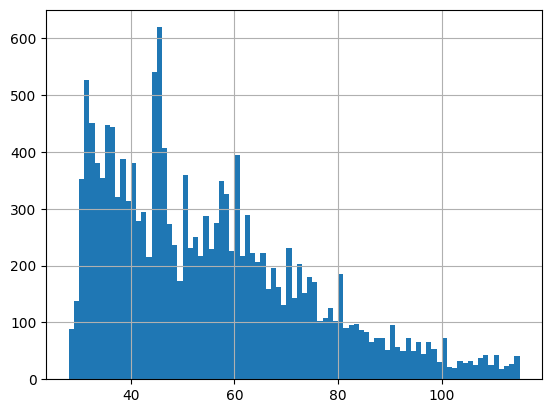

In [276]:
# изучим общую площадь
make_hist(df['total_area'])

count    16889.000000
mean        34.196132
std         22.192348
min          2.000000
25%         18.400000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64


(2.0, 77.9)

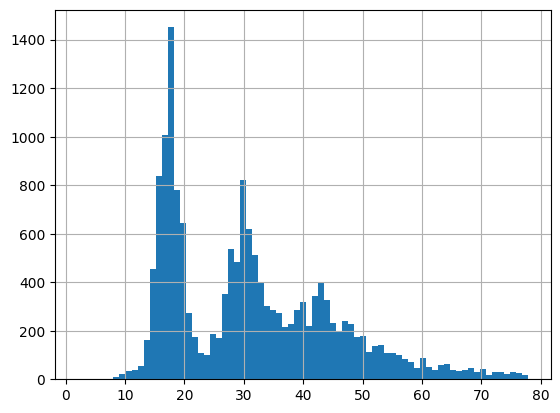

In [277]:
# изучим жилую площадь
make_hist(df['living_area'])

count    16889.000000
mean        10.784006
std          5.993229
min          0.000000
25%          7.500000
50%          9.600000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


(0.75, 18.75)

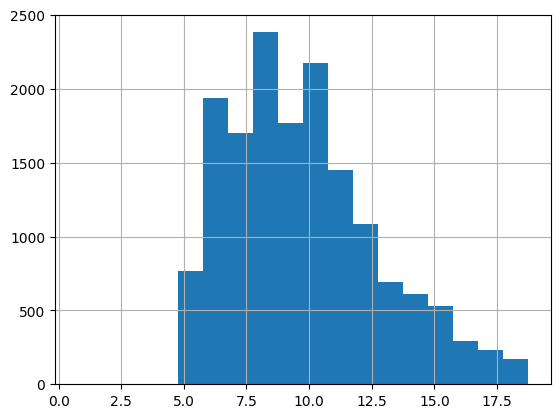

In [278]:
# изучим площадь кухни
make_hist(df['kitchen_area'])

### Изучение параметров объектов: цена объекта.

count    1.688900e+04
mean     6.590760e+06
std      1.167926e+07
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.770000e+06
max      7.630000e+08
Name: last_price, dtype: float64


(12190.0, 11675000.0)

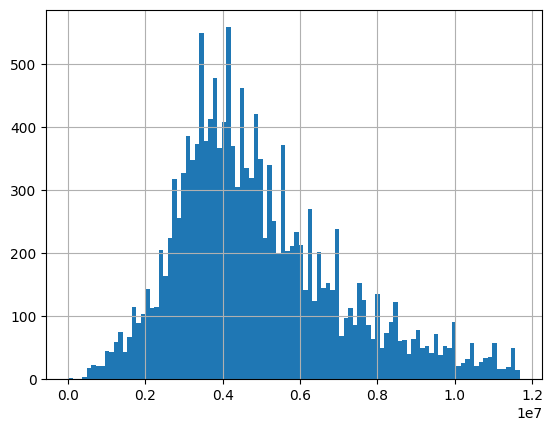

In [279]:
make_hist(df['last_price'])

count    1.688900e+04
mean     9.958867e+04
std      4.842799e+04
min      1.118000e+02
25%      7.781250e+04
50%      9.497210e+04
75%      1.132075e+05
max      1.907500e+06
Name: price_per_sqm, dtype: float64


(24720.0, 166300.0)

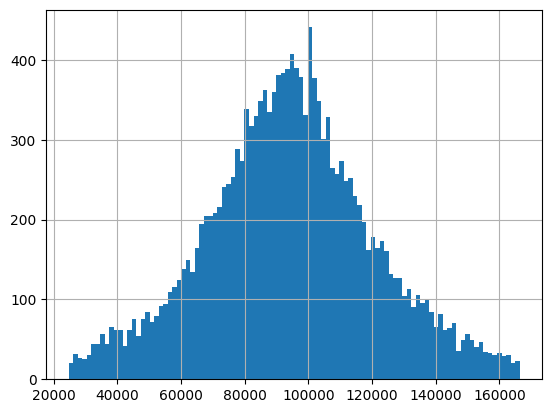

In [280]:
make_hist(df['price_per_sqm'])

### Изучение параметров объектов: количество комнат.

count    16889.000000
mean         2.021789
std          1.036519
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: rooms, dtype: float64


(0.0, 6.0)

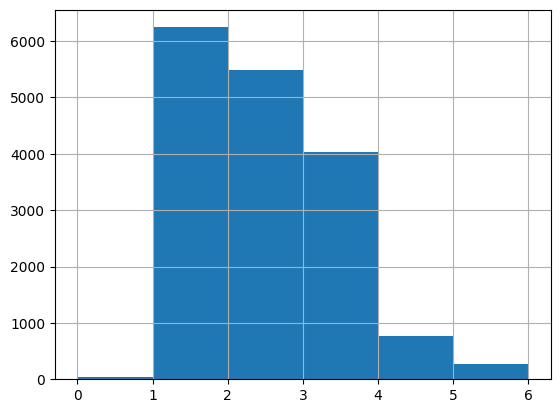

In [281]:
make_hist(df['rooms'])

### Изучение параметров объектов: высота потолков.

count    16889.000000
mean         2.741220
std          0.260338
min          2.300000
25%          2.650000
50%          2.657528
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64


(2.425, 3.0249999999999995)

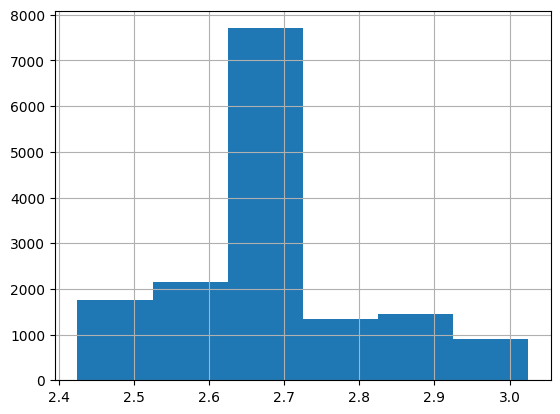

In [282]:
make_hist(df['ceiling_height'])

### Изучение параметров объектов: этаж квартиры.

count    16889.000000
mean         6.114335
std          4.961626
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         32.000000
Name: floor, dtype: float64


(1.0, 15.5)

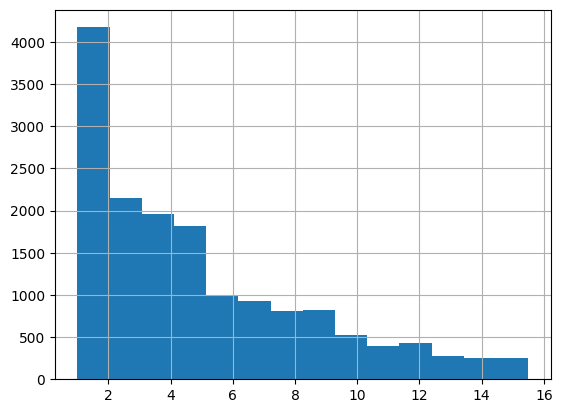

In [283]:
make_hist(df['floor'])

### Изучение параметров объектов: общее количество этажей в доме.

count    16889.000000
mean        11.102256
std          6.602221
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


(1.0, 32.5)

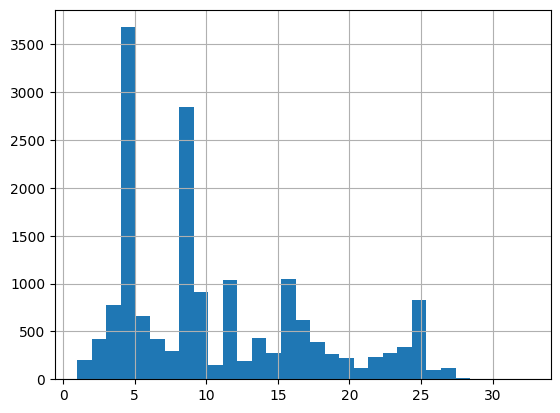

In [284]:
make_hist(df['floors_total'])

### Изучение параметров объектов: тип этажа.

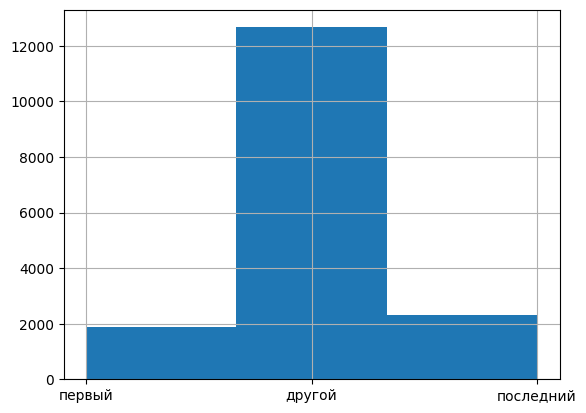

In [285]:
df['floor_category'].hist(bins=3);

### Изучение параметров объектов: расстояние до цента города (в метрах).

count    13384.000000
mean     14170.607666
std       8417.767510
min        208.000000
25%       9392.000000
50%      13162.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


(208.0, 26644.5)

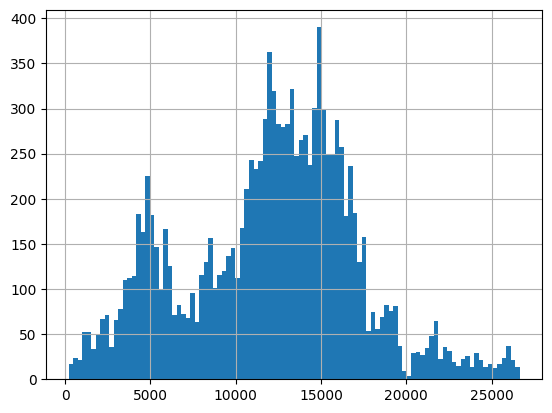

In [286]:
make_hist(df['city_centers_nearest'])

### Изучение параметров объектов: расстояние до ближайшего аэропорта.

count    13366.000000
mean     28994.694673
std      12553.347072
min       6450.000000
25%      18732.000000
50%      27014.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64


(6450.0, 65419.5)

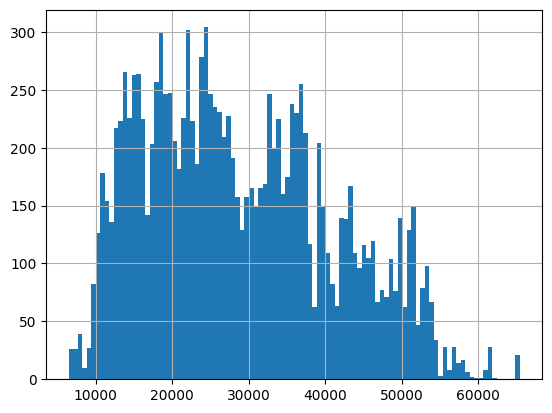

In [287]:
make_hist(df['airports_nearest'])

### Изучение параметров объектов: расстояние до ближайшего парка.

count    5908.000000
mean      492.416723
std       347.965920
min         1.000000
25%       287.000000
50%       455.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64


(1.0, 1104.5)

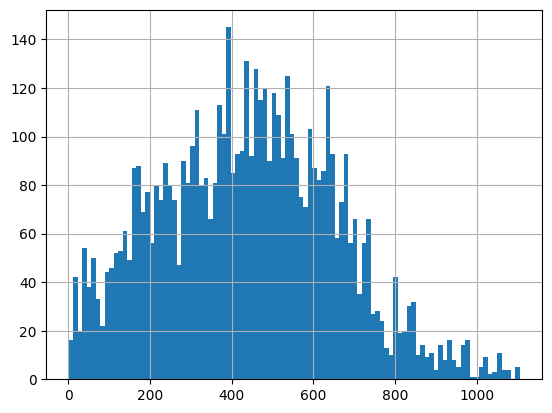

In [288]:
make_hist(df['parks_nearest'])

### Изучение параметров объектов: время публикации объявления.

count    16889.000000
mean       197.993309
std        228.095905
min          1.000000
25%         46.000000
50%        115.000000
75%        262.000000
max       1580.000000
Name: days_exposition, dtype: float64


(1.0, 586.0)

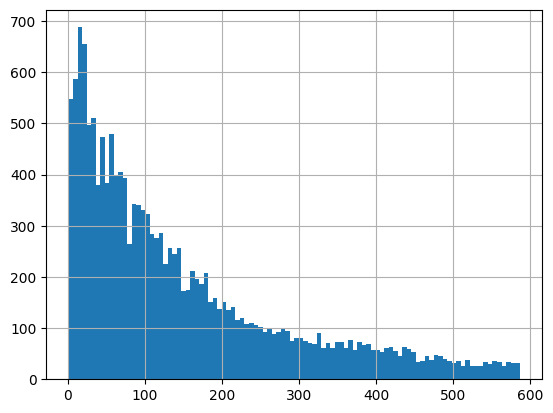

In [289]:
make_hist(df['days_exposition'])

In [290]:
df['days_exposition'].describe().to_frame()

,days_exposition
count,16889.000000
mean,197.993309
std,228.095905
min,1.000000
25%,46.000000
50%,115.000000
75%,262.000000
max,1580.000000


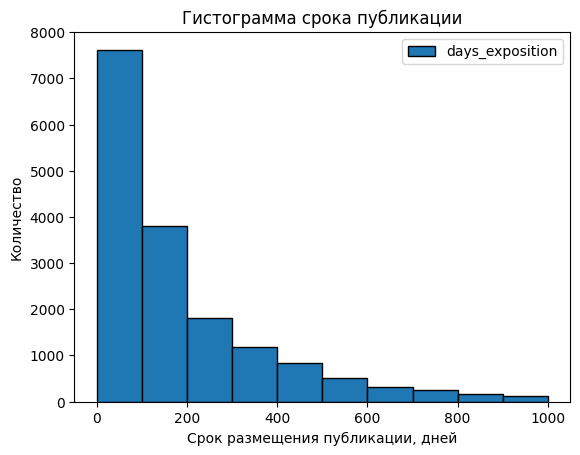

In [291]:
# гистограмма срока публикации
df.plot(y='days_exposition',
          kind='hist',
          range=(0, 1000),
          bins=10,
          ec='black')
plt.title('Гистограмма срока публикации')
plt.xlabel('Срок размещения публикации, дней')
_ = plt.ylabel('Количество')

> Большая часть квартир продавалась в течение первых 50 дней, есть и квартиры, которые продавались до года. Чем дальше, тем реже встречаются такие случаи.

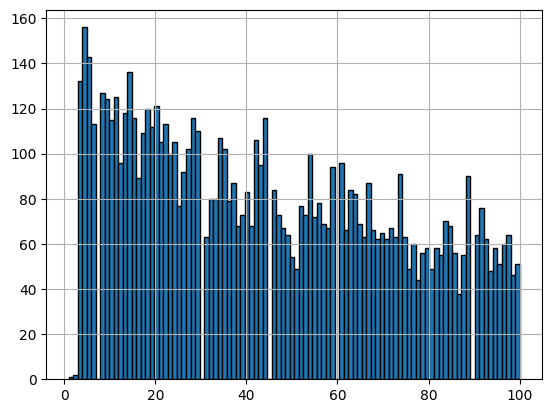

In [292]:
df['days_exposition'].hist(bins=100, range=(1,100), ec='black');

> В разделе 2.4. были обнаружены выбивающиеся значения - у нас аномалии на 45, 60, 7, 30, 90 днях - эти аномалии - это техническая особенность самой платформы: вероятнее, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил. После анализа данные были удалены из выборки.
>
> Как правило, продажа недвижимости занимала 3 месяца (95 дней). При этом четверть всех объектов недвижимости была продана в течение 45 дней с момента публикации. Если объект был продан в течение месяца, то необходимо проверить данную сделку на предмет мошенничества. Такая проверка особенна критична, если срок сделки не превышает двух недель. Кроме того, если объект был продан только после 14 месяцев (428 дней) с момента публикации, это говорит об аномально долгой продаже.

### Вывод:
1. Большая часть квартир имеет метраж от 30 до 65 кв.м, с жилой площадью в районе 30 кв.м. и кухней от 6 до 11 кв.м. Выбросы в метражах свыше 120 кв.м. обусловлены, либо личными перепланировками, либо отдельными частными домами.
2. Цена на квартиры лежит в промежутке от 3 до 12 млн. Большаячасть квартир продается за цену в промежутке между 3 и 6 млн. Больше всех квартир находяться в районе от 60 до 130 тыс. рублей за кв.м.
3. Квартиры, в большинстве своем, имеют потолки от 2,75м (самый популярный вариант) до 3,2м. Остальные случаи эксклюзивны.
4. 2/3 квартир имеют 1 или 2 комнаты, чуть меньший процент имеют 3 комнаты и небольшое количество - 4. Есть и квартиры, имеющие 5 и больше комнат, но их процент сильно ниже.
5. Где-то читала, что для здорового функционирования био-ритмических процессов, человек должен жить не выше 8 этажа. И из данных видно, что самые популярные этажи с 1 по 7. А вот этажность зданий немного расскажет об истории застройки города и области. Весь центральный Санкт-Петербург ограничен по высоте застройки шпилем Петропавловской крепости. Царская Ленобласть тоже вся низкоэтажная - отсюда такой пик на пятиэтажках. Пик на 9-этажках - это все серии домов советской застройки. А вот пики в на 16 и 25-этажках - это уже современная застройка.
6. Большая часть квартир продаётся в спальных районах и современных ЖК в пределах КАД.
7. В целом, квартиру можно продать за 3 месяца.

### Факторы, влияющие на стоимость квартиры.
Для анализа и заключений нам нужны очищенные от выбросов данные.

In [293]:
# функция, получающая на вход название признака, и возвращающая границы "усов"
def det_whiskers(column):
    stat = df[column].describe()

    # межквартирльный размах
    iqr = stat[6] - stat[4]

    # левый и правый "ус"
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)

    # левый "ус" не должен быть меньше минимального значения
    if left_whisker < stat[3]: left_whisker = stat[3]

    # правый "ус" не должен быть больше максимального значения
    if right_whisker > stat[7]: right_whisker = stat[7]

    return [left_whisker, right_whisker]

In [294]:
print(det_whiskers('total_area'))
print(det_whiskers('last_price'))
print(det_whiskers('rooms'))
print(det_whiskers('ceiling_height'))
print(det_whiskers('days_exposition'))

[28.0, 115.0]
[12190.0, 11675000.0]
[0.0, 6.0]
[2.42, 3.02]
[1.0, 586.0]


In [295]:
# добавим столбец с признаком, описывающим аномально большую площадь недвижимости
df['too_large_area'] = df['total_area'] > det_whiskers('total_area')[1]

# добавим столбец с признаком, описывающим аномально дорогую недвижимость
df['too_expensive'] = df['last_price'] > det_whiskers('last_price')[1]

# добавим столбец с признаком, описывающим недвижимость с аномально большим числом комнат
df['too_many_rooms'] = df['rooms'] > det_whiskers('rooms')[1]

# добавим столбец с признаком, описывающим недвижимость с аномально высокими или низкими потолками
df['unusual_ceiling'] = (df['ceiling_height'] > det_whiskers('ceiling_height')[1]) | (df['ceiling_height'] < det_whiskers('ceiling_height')[0])

# добавим столбец с признаками, описывающими недвижимость, которая продавалась или слишком быстро или слишком медленно
df['too_slow'] = df['days_exposition'] > det_whiskers('days_exposition')[1]
df['too_fast'] = df['days_exposition'] < 30

In [296]:
# уберем редкие и выбивающиеся значения
good_data = df[(df['too_large_area'] == False) &
     (df['too_expensive'] == False) &
     (df['too_many_rooms'] == False) &
     (df['unusual_ceiling'] == False) &
     (df['too_slow'] == False) &
     (df['too_fast'] == False)].reset_index(drop=True)

print('Доля чистых значений составила: {:.1%}'. format(len(good_data) / len(df)))

Доля чистых значений составила: 64.4%


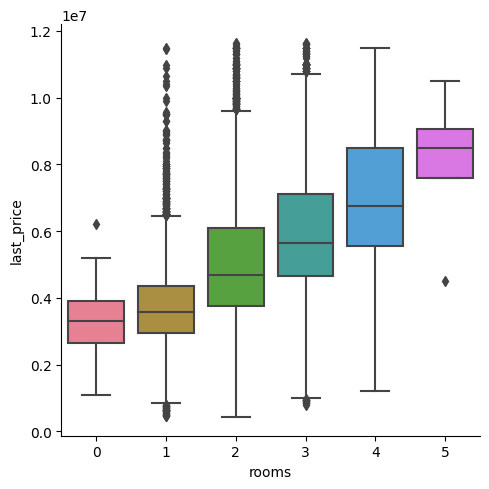

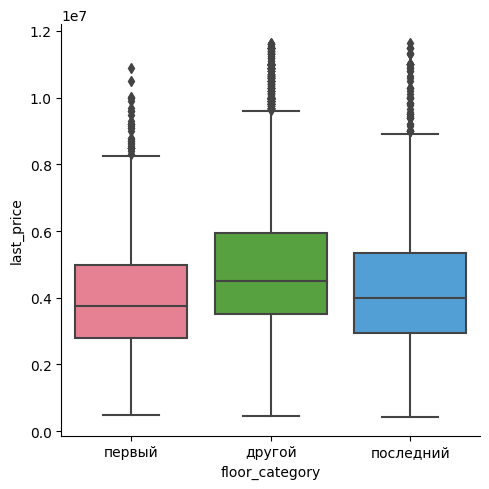

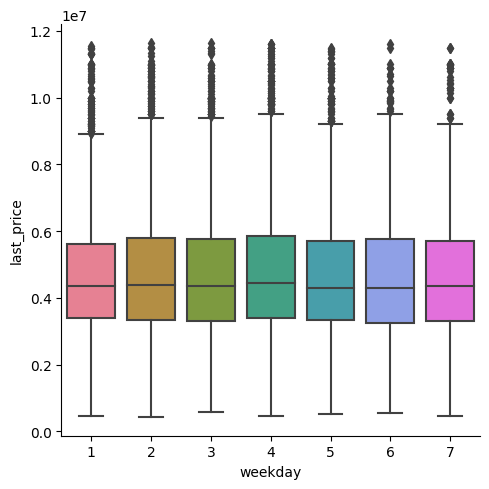

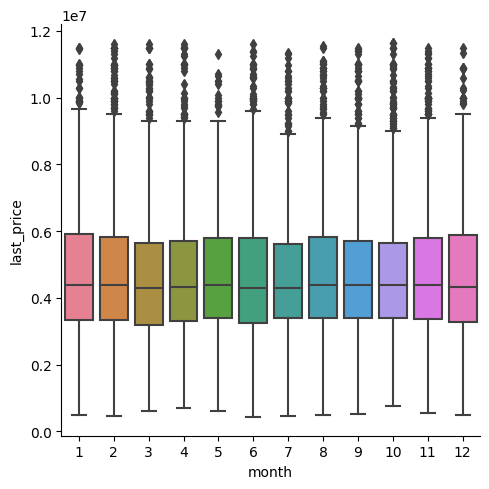

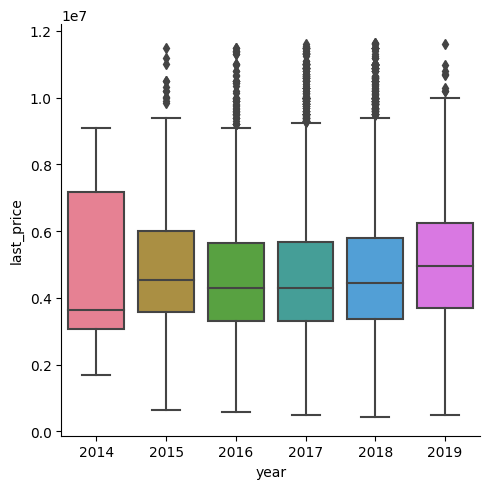

In [297]:
for column in ['rooms', 'floor_category', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=good_data, palette='husl')

#### Зависимость цены от площади квартиры и от расстояния до центра города

0.6899984507933091

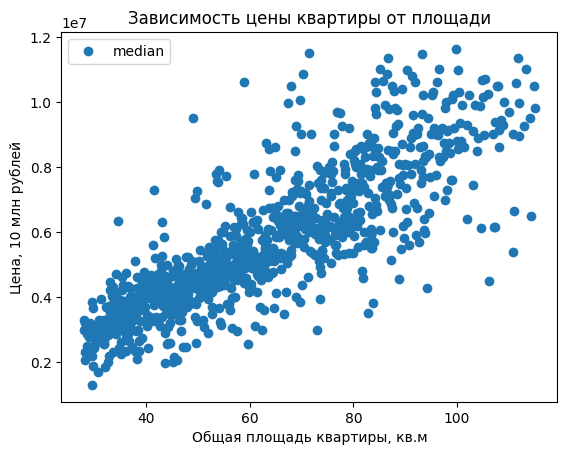

In [298]:
pivot_table_total_area = good_data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']

pivot_table_total_area.plot(y = 'median', style = 'o')
plt.title('Зависимость цены квартиры от площади')
plt.ylabel('Цена, 10 млн рублей')
plt.xlabel('Общая площадь квартиры, кв.м')

pivot_table_total_area.sort_values('median', ascending = False)

good_data['total_area'].corr(good_data['last_price'])

> Ожидаемо, наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью (коэфф. корреляции 0,68).

-0.2946817079431803

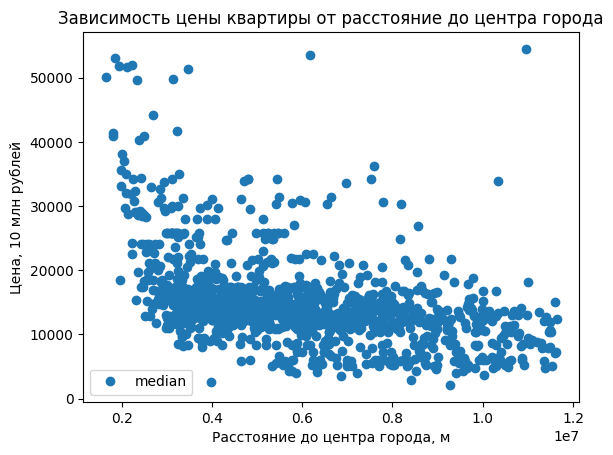

In [299]:
pivot_table_city_center = good_data.pivot_table(index = 'last_price', values = 'city_centers_nearest', aggfunc = ['mean', 'count', 'median'])
pivot_table_city_center.columns = ['mean', 'count', 'median']

pivot_table_city_center.plot(y = 'median', style = 'o')
plt.title('Зависимость цены квартиры от расстояние до центра города')
plt.ylabel('Цена, 10 млн рублей')
plt.xlabel('Расстояние до центра города, м')

pivot_table_city_center.sort_values('median', ascending = False)

good_data['last_price'].corr(good_data['city_centers_nearest'])

> Расстояние до центра города  мало влияет на стоимость квартиры, и обратно пропорционально (коэфф. корреляции -0,29).

#### Зависимость цены квадратного метра от количества комнат

Text(0.5, 0, 'Количество комнат')

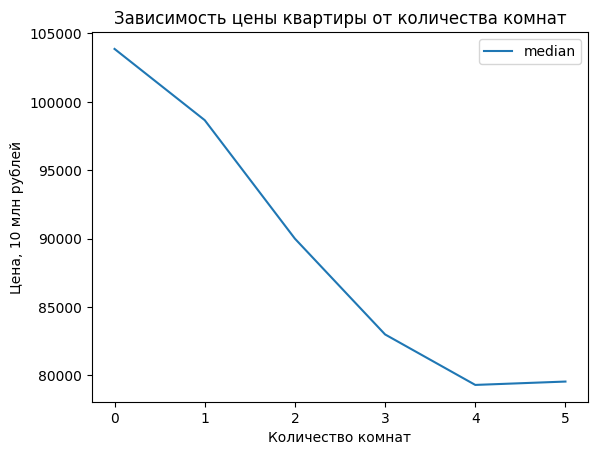

In [300]:
pivot_table_rooms = good_data.pivot_table(index = 'rooms', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']

pivot_table_rooms.plot(y = 'median')
plt.title('Зависимость цены квартиры от количества комнат')
plt.ylabel('Цена, 10 млн рублей')
plt.xlabel('Количество комнат')

> Стоимость квартиры также напрямую зависит от числа комнат: чем их больше, тем квартира дороже. Но это верно, пока число комнат не превышает трех: 4- или 5-комнатные квартиры могут быть проданы дешевле 3-комнатных, и вызвано это скорее всего отсутствием спроса.

#### Зависимость цены квадратного метра от этажа

,mean,count,median
floor_category,,,
другой,94576.622022,8083,94772.7
первый,77741.155190,1339,78947.4
последний,82331.915438,1451,83412.3


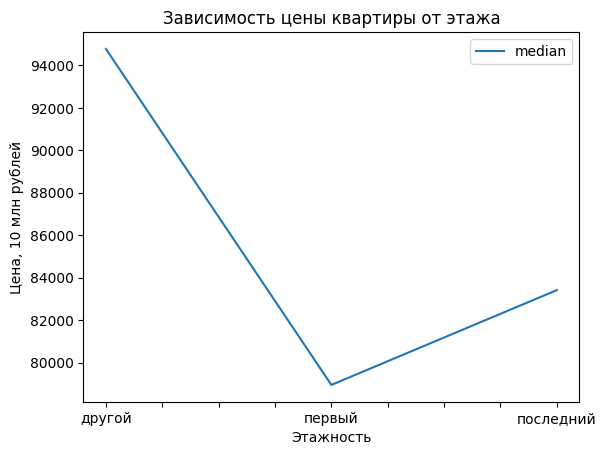

In [301]:
pivot_table_floor_category = good_data.pivot_table(index = 'floor_category', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']

pivot_table_floor_category.plot(y = 'median')
plt.title('Зависимость цены квартиры от этажа')
plt.ylabel('Цена, 10 млн рублей')
plt.xlabel('Этажность')

pivot_table_floor_category

> Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.

#### Зависимость цены квадратного метра от даты размещения

,mean,count,median
weekday,,,
1,91007.901658,1628,92105.30
3,90823.958431,1785,92017.70
2,91358.540751,1892,91882.35
4,91548.223038,1988,91839.40
7,90438.625462,758,91170.85
5,90337.142075,1937,91111.10
6,89668.331525,885,89506.20


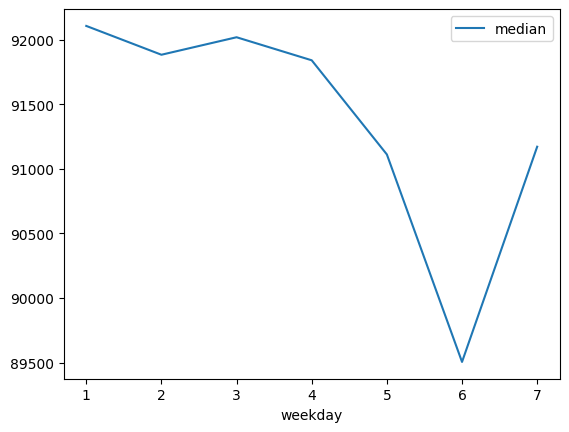

In [302]:
pivot_table_weekday_exposition = good_data.pivot_table(index = 'weekday', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

> Самые дорогие квартиры выставляют с понедельника по четверг.
>
> Спад в субботу и воскресенье, связан с тем, что риелторы, просто в эти дни показывают ранее выставленные объекты, и новых объявлений выставляется меньше.
>
> А вот по пятницам действительно выставляются квартиры подешевле.

,mean,count,median
month,,,
8,92908.126682,847,94029.90
9,92337.527171,979,93243.20
1,91734.068865,652,93172.65
7,91715.327021,829,92222.20
10,90910.841296,1080,91699.00
11,90532.055744,1062,91394.80
2,90550.030145,1244,91346.20
5,91602.800746,670,91043.10
12,90296.072423,776,90552.70


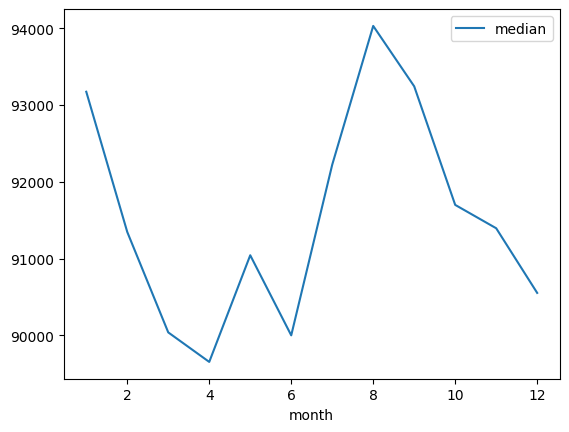

In [303]:
pivot_table_month_exposition = good_data.pivot_table(index = 'month', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

> Самая высокая стоимость метра в январе, августе и сентябре! Самая низкая стоимость в марте, апреле и июне!

,mean,count,median
year,,,
2014,85.197434,113,76.100
2015,71.629596,1040,60.125
2016,63.629045,2346,55.600
2017,61.397507,6638,53.000
2018,57.043826,5912,50.400
2019,55.238619,840,48.800


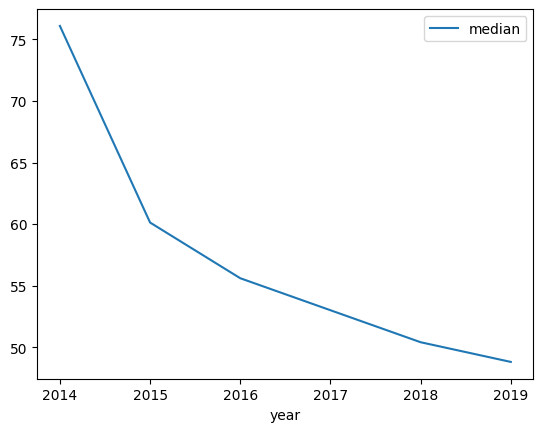

In [308]:
pivot_table_year_exposition = df.pivot_table(index = 'year', values = 'total_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

,mean,count,median
year,,,
2014,1.176003e+07,113,7476560
2015,8.504988e+06,1040,5400000
2019,6.106428e+06,840,4950000
2016,7.075476e+06,2346,4800000
2018,5.900447e+06,5912,4640000
2017,6.707649e+06,6638,4600000


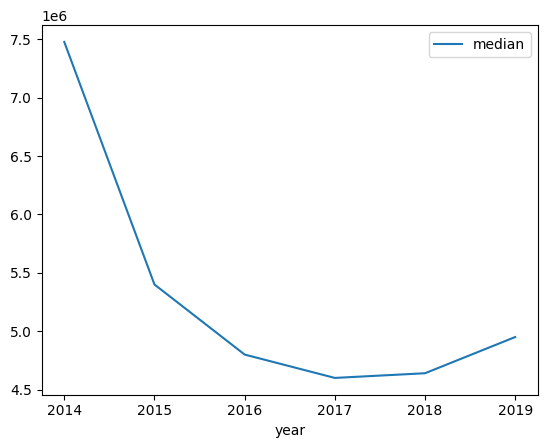

In [307]:
pivot_table_year_exposition = df.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

Видим, что с 2014 до 2017 года цена падала, но далее начала увеличиваться!

Первая программа льготной ипотеки была запущена в 2015 году, и мне кажется, именно она остановила падение цен на рынке недвижимости. И потом льготная ипотека очень сильно разогнала цены на квартиры в новостройках. А за ними уже и цены на вторичном рынке стали расти.

In [309]:
price_per_year = df['year'].value_counts().index.tolist()
mean_year_metrics = [df[df['year'] == year]['price_per_sqm'].median().round(2) for year in price_per_year]
mean_year_prices = [df[df['year'] == year]['last_price'].median() for year in price_per_year]
mean_year_area = [df[df['year'] == year]['total_area'].median() for year in price_per_year]
frame = {'Год': price_per_year, 'Средняя площадь квартиры, кв.м.': mean_year_area, 'Средняя цена за кв.м., тыс. руб.': mean_year_metrics, 'Средняя цена за квартиру, млн. руб.': mean_year_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя площадь квартиры, кв.м.', ascending=False)
dataframe

,Год,"Средняя площадь квартиры, кв.м.","Средняя цена за кв.м., тыс. руб.","Средняя цена за квартиру, млн. руб."
5,2014,76.100,106187.60,7476560.0
3,2015,60.125,93405.40,5400000.0
2,2016,55.600,92463.95,4800000.0
0,2017,53.000,93421.10,4600000.0
1,2018,50.400,96428.60,4640000.0
4,2019,48.800,105197.95,4950000.0


>  В среднем квартиры продавались по более высоким ценам в 2014 году, но это объясняется макроэкономической ситуацией и переходом ЦБ РФ к плавающему курсу в конце 2014 года.
>
> Резкое падение цен с 2014 года обусловлено мировым финансовым кризисом.
>
> До 2017 года цены на квартиры всё еще падают.
>
> 2017-2019 цена на квартиры растёт, в то время как площадь продаваемых квартир продалжает падать, т.е. стоимость квадратного метра возрасла почти в 1.5 раза.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [310]:
top10 = good_data['locality_name'].value_counts().index.tolist()[:10]
mean10_metrics = [good_data[good_data['locality_name'] == city]['price_per_sqm'].median().round(2) for city in top10]
mean10_prices = [good_data[good_data['locality_name'] == city]['last_price'].median() for city in top10]
frame = {'Город': top10, 'Средняя цена за кв.м., тыс. руб.': mean10_metrics, 'Средняя цена за квартиру, млн. руб.': mean10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за квартиру, млн. руб.', ascending=False)
dataframe

,Город,"Средняя цена за кв.м., тыс. руб.","Средняя цена за квартиру, млн. руб."
6,Пушкин,97475.65,5050000.0
0,Санкт-Петербург,100657.40,4990000.0
5,Парголово,91346.20,4100000.0
2,Шушары,75581.40,4000000.0
3,Кудрово,93714.30,4000000.0
7,Колпино,74468.10,3750000.0
1,Мурино,82960.85,3456000.0
4,Всеволожск,65843.50,3450000.0
8,Гатчина,66666.70,3100000.0
9,Выборг,57894.70,2900000.0


> Из представленных 10 населенных пунктов с наибольшим числом объявлений лидеры по средней цене квадратного метра: Санкт-Петербург, Пушкин и Парголово.
>
> Однако в среднем дешевле всего квадратные метры в Выборге: средняя цена за квадратный метр в 2 раз ниже, чем в Санкт-Петербурге.

### Исследование параметров объектов из центра Санкт-Петербурга.

In [311]:
# выделение центра Санкт-Петербурга
df['city_centers_km'] = round(df['city_centers_nearest'] / 1000, 0)
df['city_centers_km'] = df['city_centers_km'].astype('int', errors='ignore')
good_data = df[(df['too_large_area'] == False) &
     (df['too_expensive'] == False) &
     (df['too_many_rooms'] == False) &
     (df['unusual_ceiling'] == False) &
     (df['too_slow'] == False) &
     (df['too_fast'] == False)].reset_index(drop=True)

good_data.loc[(good_data['locality_name'] == 'Санкт-Петербург') & (good_data['city_centers_km'].notna()), 'city_centers_km'].apply(round)
spb_data = good_data.query('locality_name == "Санкт-Петербург"')
spb_center_nearest = spb_data.pivot_table(index='city_centers_km', values=['price_per_sqm', 'last_price'], aggfunc='median')
spb_center_nearest.head()

,last_price,price_per_sqm
city_centers_km,,
1.0,7400000.0,112000.00
2.0,7490000.0,102916.65
3.0,6800000.0,99772.50
4.0,7200000.0,107575.80
5.0,7200000.0,122876.70


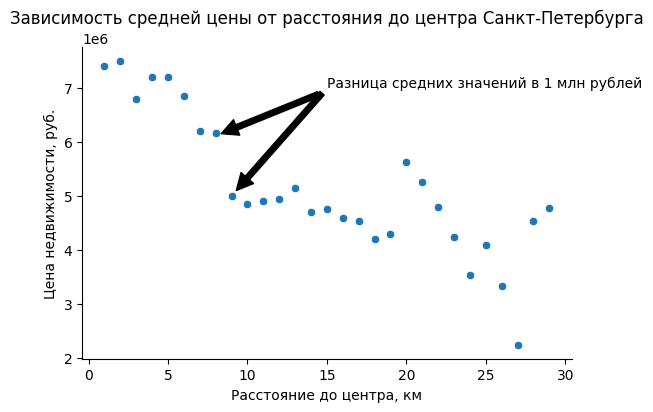

In [312]:
sns.relplot(x=spb_center_nearest.index, y='last_price', data=spb_center_nearest, height=4, aspect=1.4)
plt.annotate('Разница средних значений в 1 млн рублей', xy=(8, 6110000), xytext=(15, 7000000),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('', xy=(9, 5000000), xytext=(15, 7000000),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
plt.ylabel('Цена недвижимости, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

Таким образом, будем считать центром Санкт-Петербурга окружность радиусом 8 км.

count    881.000000
mean      60.363065
std       18.820105
min       28.000000
25%       45.300000
50%       58.600000
75%       72.000000
max      114.800000
Name: total_area, dtype: float64


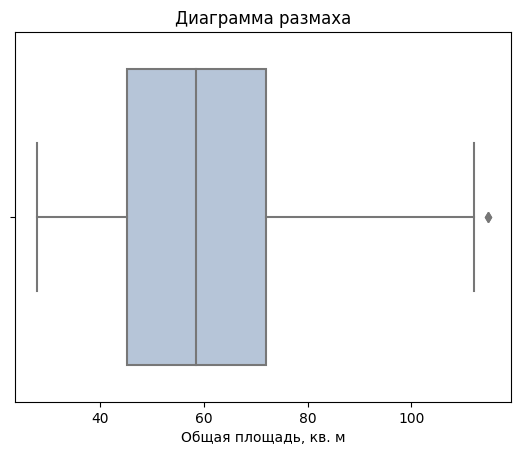

In [326]:
spb_center = good_data[(good_data['city_centers_km'] <= 8) & (good_data['locality_name'] == 'Санкт-Петербург')].reset_index(drop=True)

print(spb_center['total_area'].describe())

sns.boxplot(x=spb_center['total_area'], color='lightsteelblue')
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, кв. м')
plt.show()

count    8.810000e+02
mean     6.953067e+06
std      2.092236e+06
min      2.750000e+06
25%      5.400000e+06
50%      6.650000e+06
75%      8.500000e+06
max      1.163492e+07
Name: last_price, dtype: float64


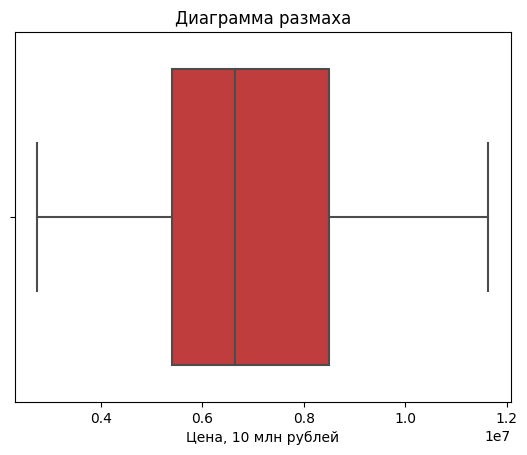

In [327]:
print(spb_center['last_price'].describe())
sns.boxplot(x=spb_center['last_price'], color='tab:red')
plt.title('Диаграмма размаха')
plt.xlabel('Цена, 10 млн рублей')
plt.show()

count    881.000000
mean       2.078320
std        0.901763
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: rooms, dtype: float64


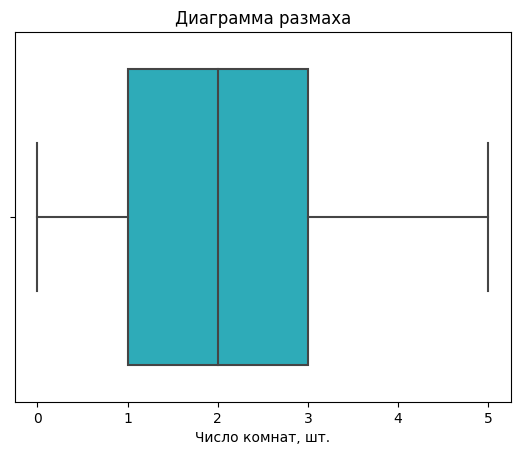

In [328]:
print(spb_center['rooms'].describe())
sns.boxplot(x=spb_center['rooms'], color='tab:cyan')
plt.title('Диаграмма размаха')
plt.xlabel('Число комнат, шт.')
plt.show()

count    881.000000
mean       2.820809
std        0.152357
min        2.500000
25%        2.710000
50%        2.886499
75%        2.886499
max        3.020000
Name: ceiling_height, dtype: float64


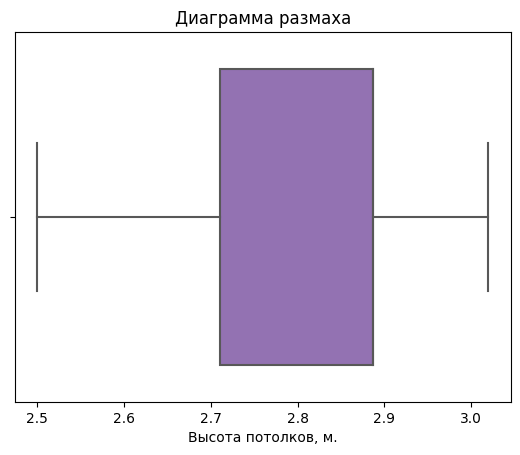

In [330]:
print(spb_center['ceiling_height'].describe())
sns.boxplot(x=spb_center['ceiling_height'], color='tab:purple')
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков, м.')
plt.show()

count    881.000000
mean     191.459705
std      140.965529
min       31.000000
25%       77.000000
50%      148.000000
75%      272.000000
max      582.000000
Name: days_exposition, dtype: float64


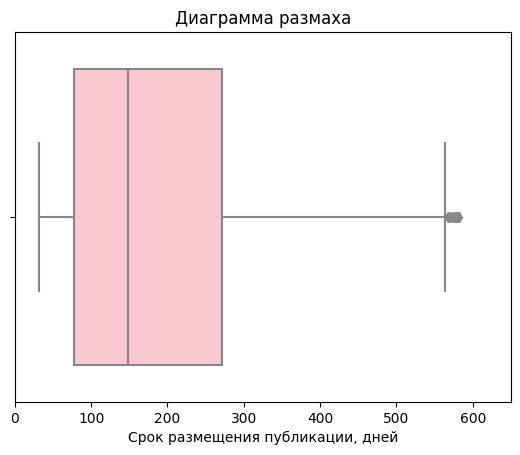

In [336]:
print(spb_center['days_exposition'].describe())
sns.boxplot(x=spb_center['days_exposition'], color='pink')
plt.title('Диаграмма размаха')
plt.xlabel('Срок размещения публикации, дней')
plt.xlim(0, 650)
plt.show()

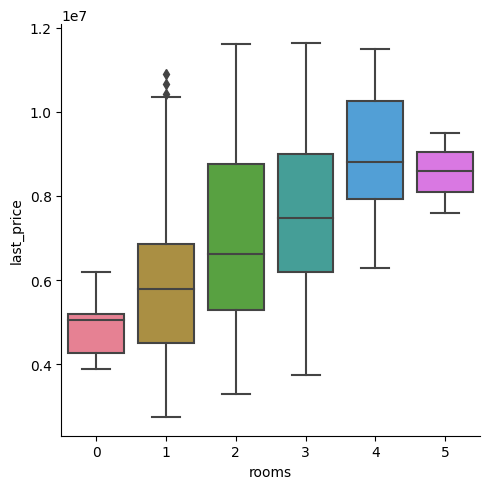

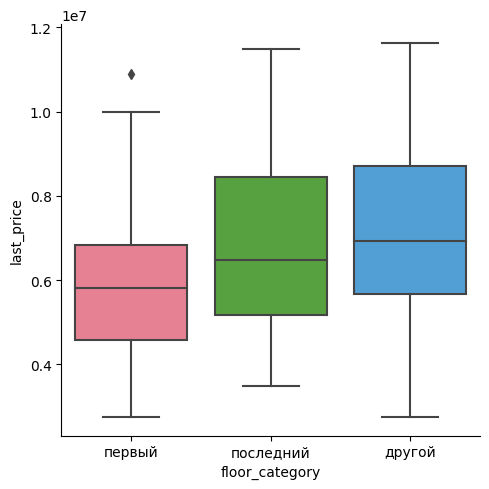

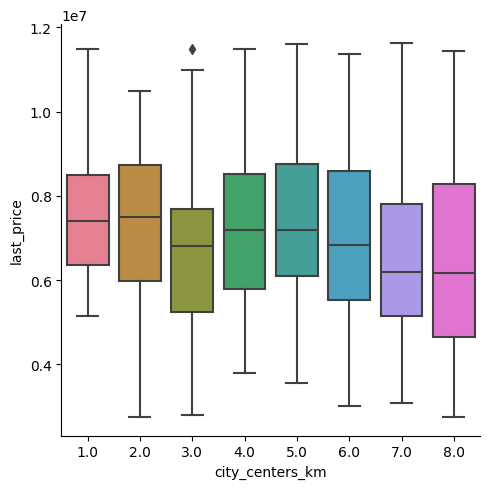

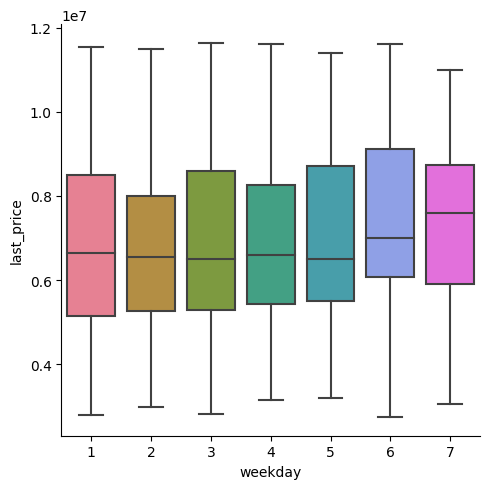

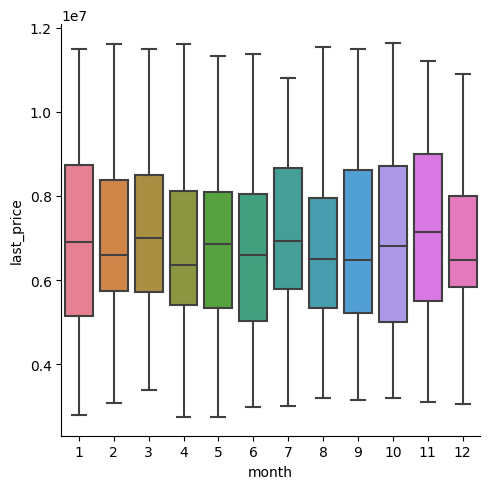

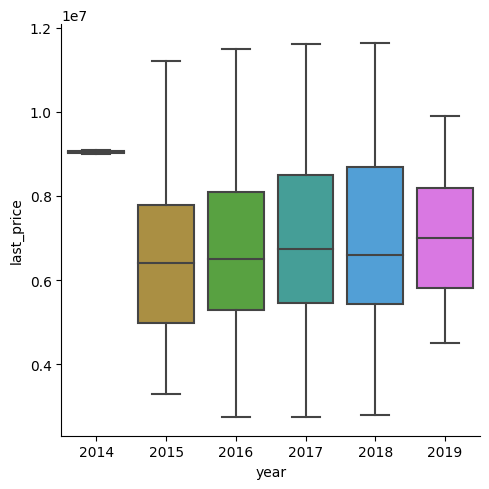

In [338]:
for column in ['rooms', 'floor_category', 'city_centers_km', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=spb_center, palette='husl')

### Выводы:
**Факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга:**
1. **Зависимость стоимости квартиры от числа комнат в центре Санкт-Петербурга сильнее**: здесь больше платежеспособного спроса на 5-комнатные квартиры, что приводит к прямо пропорциональной зависимости цены от числа комнат. Другими словами, 5-комнатные квартиры в центре Санкт-Петербурга, как правило, будут продаваться дороже, чем 4-комнатные.
2. Кроме того, в центре города наблюдается явно выраженная зависимость от этажа квартиры: **квартира на последнем этаже в среднем будет стоить дороже, чем на первом.** Это не наблюдается в явном виде в окрестностях центра.
3. **Чем дальше от центра города, тем в среднем квартира будет стоить дешевле:** в среднем разница в стоимости между первым и восьмым километром от центра может достигать 2 млн руб.
4. Странным образом квартиры, объявления о продаже которых публиковались по воскресеньям, продавались в среднем по более высокой цене. То же верно и для объявлений, опубликованных в начале весны и начале осени (в марте и сентябре соответственно) в период 2015-2019 гг.: в среднем такие квартиры продавались дороже.

# Вывод:
1. В части предобработки данных было удалено 28.74%:
- Данные о недвижимсоти были проверены на соответствие государственным стандартам по СП для Многоквартирных домов: в частности высота потолков не ниже 2.5 метров, площадь кухни не меньше 5 метров и жилая площадь - от 28 кв.м. Все данные с нарушениями были удалены.
- В ходе исследования, в данных столбца days_exposition было обнаружено аномально большое количество закрытых объявлений через 45, 60, 7, 30, 90 дней. Выявлено, что такие аномалии связаны с правилами размещения бесплатных объявлений в сервисе Яндекс.Недвижимость. Эта часть данных была удалена.
- Также аномальные занчения были обнаружены в столбце ceiling_height (высота потолков в 27 или 30 метров). Предположительно, причина появления таких аномальных значений - ручной ввод, поэтому они были обработаны и восстановлены.
- Удалось восстановить часть данных для столбцов: floors_total по значениям из столбца floor, locality_name по значениям из столбца city_centers_nearest, living_area и kitchen_area по значениям из столбца total_area.
- Тип данных в first_day_exposition был заменен со строчного на временной. Кроме того, следующие столбцы приведены в целочисленный тип(int): last_price, floors_total, balcony, parks_around3000, ponds_around3000, days_exposition.
2. В части исследовательской работы:
- В таблицу дыли добавлены: цена за квадратный метр, день, месяц и год публикации объявления, тип этажа квартиры и расстояние до центра в километрах.
- Для определения рыночной стоимости объектов недвижимости важны следующие параметры:
 - общая площадь квартиры (аномальные значения: более 114,25 кв. м);
 - расстояние до центра города (Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 8 километров.);
 - число комнат и этаж квартиры (чем ближе к центру, тем эти факторы весомее);
 - срок продажи квартиры (слишком быстрая продажа — до 1 месяца (особенно аномальные сроки меньше 2-х недель), слишком долгая продажа — более 1,5 лет).
3. Важно учесть, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели по рынку в целом. Поэтому велика вероятность, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному. Именно об этом нам и говорят данные, полученные при изучении единственного сегмента квартир - находящихся в Центральном районе Санкт-Петербурга: в то время, когда средняя стоимость метра по рынку в 2015-2016 годах всё ещё падала, какие-то аналогичные прошлым годам квартиры могли и не падать в цене, а наоборот дорожать.